# Mount Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import Statements

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Read Data

In [ ]:
data = pd.read_csv('/content/drive/My Drive/AML_project/Processed Data/data_final.csv')

# Final Clean and Partition

In [ ]:
data = data.set_index('zip')
data.drop('index', axis=1, inplace=True)
data.head()

,2020_zip_tot,2015_zip_tot,2010_zip_tot,pct_change_10_15,pct_change_15_20,pct_change_10_20,naive_10_15,naive_15_20,naive_10_20,IQR_10_15,IQR_15_20,IQR_10_20,Percent!!BEDROOMS!!Total housing units!!2 bedrooms_15,Percent!!BEDROOMS!!Total housing units!!3 bedrooms_15,Percent!!BEDROOMS!!Total housing units!!4 bedrooms_15,Percent!!BEDROOMS!!Total housing units!!5 or more bedrooms_15,Percent!!BEDROOMS!!Total housing units!!No bedroom_15,Percent!!CLASS OF WORKER!!Civilian employed population 16 years and over_15,Percent!!CLASS OF WORKER!!Civilian employed population 16 years and over!!Government workers_15,Percent!!CLASS OF WORKER!!Civilian employed population 16 years and over!!Private wage and salary workers_15,Percent!!CLASS OF WORKER!!Civilian employed population 16 years and over!!Self-employed in own not incorporated business workers_15,Percent!!CLASS OF WORKER!!Civilian employed population 16 years and over!!Unpaid family workers_15,Percent!!COMMUTING TO WORK!!Workers 16 years and over_15,"Percent!!COMMUTING TO WORK!!Workers 16 years and over!!Car, truck, or van -- carpooled_15","Percent!!COMMUTING TO WORK!!Workers 16 years and over!!Car, truck, or van -- drove alone_15",Percent!!COMMUTING TO WORK!!Workers 16 years and over!!Other means_15,Percent!!COMMUTING TO WORK!!Workers 16 years and over!!Public transportation (excluding taxicab)_15,Percent!!COMMUTING TO WORK!!Workers 16 years and over!!Walked_15,Percent!!COMMUTING TO WORK!!Workers 16 years and over!!Worked at home_15,Percent!!EDUCATIONAL ATTAINMENT!!Percent bachelor's degree or higher_15,Percent!!EDUCATIONAL ATTAINMENT!!Percent high school graduate or higher_15,Percent!!EDUCATIONAL ATTAINMENT!!Population 25 years and over_15,"Percent!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!9th to 12th grade, no diploma_15",Percent!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Associate's degree_15,Percent!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Bachelor's degree_15,Percent!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Graduate or professional degree_15,Percent!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!High school graduate (includes equivalency)_15,Percent!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Less than 9th grade_15,"Percent!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Some college, no degree_15",Percent!!EMPLOYMENT STATUS!!Civilian labor force_15,Percent!!EMPLOYMENT STATUS!!Females 16 years and over_15,Percent!!EMPLOYMENT STATUS!!Population 16 years and over_15,Percent!!FERTILITY!!Number of women 15 to 50 years old who had a birth in the past 12 months_15,"Percent!!FERTILITY!!Number of women 15 to 50 years old who had a birth in the past 12 months!!Unmarried women (widowed, divorced, and never married)_15",Percent!!GRANDPARENTS!!Number of grandparents living with own grandchildren under 18 years_15,Percent!!GRANDPARENTS!!Number of grandparents responsible for own grandchildren under 18 years_15,Percent!!GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME (GRAPI)!!Occupied units paying rent (excluding units where GRAPI cannot be computed)_15,Percent!!GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME (GRAPI)!!Occupied units paying rent (excluding units where GRAPI cannot be computed)!!15.0 to 19.9 percent_15,Percent!!GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME (GRAPI)!!Occupied units paying rent (excluding units where GRAPI cannot be computed)!!20.0 to 24.9 percent_15,Percent!!GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME (GRAPI)!!Occupied units paying rent (excluding units where GRAPI cannot be computed)!!25.0 to 29.9 percent_15,Percent!!GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME (GRAPI)!!Occupied units paying rent (excluding units where GRAPI cannot be computed)!!30.0 to 34.9 percent_15,Percent!!GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME (GRAPI)!!Occupied units paying rent (excluding units where GRAPI cannot be computed)!!35.0 percent or more_15,Percent!!GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INC

In [ ]:
data.isna().sum()

2020_zip_tot                                                                                                                                                                                              0
2015_zip_tot                                                                                                                                                                                              0
2010_zip_tot                                                                                                                                                                                              0
pct_change_10_15                                                                                                                                                                                          0
pct_change_15_20                                                                                                                                                                        

In [ ]:
data_cols = list(data.columns)
print(data_cols)

['2020_zip_tot', '2015_zip_tot', '2010_zip_tot', 'pct_change_10_15', 'pct_change_15_20', 'pct_change_10_20', 'naive_10_15', 'naive_15_20', 'naive_10_20', 'IQR_10_15', 'IQR_15_20', 'IQR_10_20', 'Percent!!BEDROOMS!!Total housing units!!2 bedrooms_15', 'Percent!!BEDROOMS!!Total housing units!!3 bedrooms_15', 'Percent!!BEDROOMS!!Total housing units!!4 bedrooms_15', 'Percent!!BEDROOMS!!Total housing units!!5 or more bedrooms_15', 'Percent!!BEDROOMS!!Total housing units!!No bedroom_15', 'Percent!!CLASS OF WORKER!!Civilian employed population 16 years and over_15', 'Percent!!CLASS OF WORKER!!Civilian employed population 16 years and over!!Government workers_15', 'Percent!!CLASS OF WORKER!!Civilian employed population 16 years and over!!Private wage and salary workers_15', 'Percent!!CLASS OF WORKER!!Civilian employed population 16 years and over!!Self-employed in own not incorporated business workers_15', 'Percent!!CLASS OF WORKER!!Civilian employed population 16 years and over!!Unpaid family 

In [ ]:
# Fill NaN with 0
data.fillna(0, inplace=True)

In [ ]:
# Replace inf with NaN
data.replace(np.inf, np.nan, inplace=True)

In [ ]:
# Fill NaN with column max
data.fillna(data.max(), downcast='infer', inplace=True)

In [ ]:
gp_cols = ['2020_zip_tot', '2015_zip_tot', '2010_zip_tot', 'pct_change_10_15', 'pct_change_15_20', 'pct_change_10_20', 'naive_10_15', 'naive_15_20', 'naive_10_20', 'IQR_10_15', 'IQR_15_20', 'IQR_10_20']
pit_cols = gp_cols.copy()
cagr_cols = gp_cols.copy()

for col in data_cols:
  if col not in gp_cols:
    if col.endswith('_cagr'):
      cagr_cols.append(col)
    else:
      pit_cols.append(col)

In [ ]:
pit = data[pit_cols]
cagr = data[cagr_cols]

In [ ]:
print(pit.shape)
pit.head()

(180, 333)


,2020_zip_tot,2015_zip_tot,2010_zip_tot,pct_change_10_15,pct_change_15_20,pct_change_10_20,naive_10_15,naive_15_20,naive_10_20,IQR_10_15,IQR_15_20,IQR_10_20,Percent!!BEDROOMS!!Total housing units!!2 bedrooms_15,Percent!!BEDROOMS!!Total housing units!!3 bedrooms_15,Percent!!BEDROOMS!!Total housing units!!4 bedrooms_15,Percent!!BEDROOMS!!Total housing units!!5 or more bedrooms_15,Percent!!BEDROOMS!!Total housing units!!No bedroom_15,Percent!!CLASS OF WORKER!!Civilian employed population 16 years and over_15,Percent!!CLASS OF WORKER!!Civilian employed population 16 years and over!!Government workers_15,Percent!!CLASS OF WORKER!!Civilian employed population 16 years and over!!Private wage and salary workers_15,Percent!!CLASS OF WORKER!!Civilian employed population 16 years and over!!Self-employed in own not incorporated business workers_15,Percent!!CLASS OF WORKER!!Civilian employed population 16 years and over!!Unpaid family workers_15,Percent!!COMMUTING TO WORK!!Workers 16 years and over_15,"Percent!!COMMUTING TO WORK!!Workers 16 years and over!!Car, truck, or van -- carpooled_15","Percent!!COMMUTING TO WORK!!Workers 16 years and over!!Car, truck, or van -- drove alone_15",Percent!!COMMUTING TO WORK!!Workers 16 years and over!!Other means_15,Percent!!COMMUTING TO WORK!!Workers 16 years and over!!Public transportation (excluding taxicab)_15,Percent!!COMMUTING TO WORK!!Workers 16 years and over!!Walked_15,Percent!!COMMUTING TO WORK!!Workers 16 years and over!!Worked at home_15,Percent!!EDUCATIONAL ATTAINMENT!!Percent bachelor's degree or higher_15,Percent!!EDUCATIONAL ATTAINMENT!!Percent high school graduate or higher_15,Percent!!EDUCATIONAL ATTAINMENT!!Population 25 years and over_15,"Percent!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!9th to 12th grade, no diploma_15",Percent!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Associate's degree_15,Percent!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Bachelor's degree_15,Percent!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Graduate or professional degree_15,Percent!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!High school graduate (includes equivalency)_15,Percent!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Less than 9th grade_15,"Percent!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Some college, no degree_15",Percent!!EMPLOYMENT STATUS!!Civilian labor force_15,Percent!!EMPLOYMENT STATUS!!Females 16 years and over_15,Percent!!EMPLOYMENT STATUS!!Population 16 years and over_15,Percent!!FERTILITY!!Number of women 15 to 50 years old who had a birth in the past 12 months_15,"Percent!!FERTILITY!!Number of women 15 to 50 years old who had a birth in the past 12 months!!Unmarried women (widowed, divorced, and never married)_15",Percent!!GRANDPARENTS!!Number of grandparents living with own grandchildren under 18 years_15,Percent!!GRANDPARENTS!!Number of grandparents responsible for own grandchildren under 18 years_15,Percent!!GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME (GRAPI)!!Occupied units paying rent (excluding units where GRAPI cannot be computed)_15,Percent!!GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME (GRAPI)!!Occupied units paying rent (excluding units where GRAPI cannot be computed)!!15.0 to 19.9 percent_15,Percent!!GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME (GRAPI)!!Occupied units paying rent (excluding units where GRAPI cannot be computed)!!20.0 to 24.9 percent_15,Percent!!GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME (GRAPI)!!Occupied units paying rent (excluding units where GRAPI cannot be computed)!!25.0 to 29.9 percent_15,Percent!!GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME (GRAPI)!!Occupied units paying rent (excluding units where GRAPI cannot be computed)!!30.0 to 34.9 percent_15,Percent!!GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME (GRAPI)!!Occupied units paying rent (excluding units where GRAPI cannot be computed)!!35.0 percent or more_15,Percent!!GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INC

# Train / Test Split

## Point-in-Time Data

In [ ]:
# Split features and targets
target_col = 'naive_15_20'
X_pit, y_pit = pit.drop(gp_cols, axis=1), pit[target_col]

# Normalize columns of X
X_pit = normalize(X_pit, axis = 0)
X_pit = pd.DataFrame(X_pit, index=pit.index, columns=pit.drop(gp_cols, axis=1).columns)

# Train / test split
test_size = 0.1
X_pit_train, X_pit_test, y_pit_train, y_pit_test = train_test_split(X_pit, y_pit, test_size=test_size, random_state=0)

print(X_pit_train.shape)
print(X_pit_test.shape)
print(y_pit_train.shape)
print(y_pit_test.shape)

(162, 321)
(18, 321)
(162,)
(18,)


## CAGR Data

In [ ]:
# Split features and targets
target_col = 'naive_15_20'
X_cagr, y_cagr = cagr.drop(gp_cols, axis=1), cagr[target_col]

# Normalize columns of X
X_cagr = normalize(X_cagr, axis = 0)
X_cagr = pd.DataFrame(X_cagr, index=cagr.index, columns=cagr.drop(gp_cols, axis=1).columns)

# Train / test split
test_size = 0.1
X_cagr_train, X_cagr_test, y_cagr_train, y_cagr_test = train_test_split(X_cagr, y_cagr, test_size=test_size, random_state=0)

print(X_cagr_train.shape)
print(X_cagr_test.shape)
print(y_cagr_train.shape)
print(y_cagr_test.shape)

(162, 321)
(18, 321)
(162,)
(18,)


# Modeling (All Columns)

## Point-in-Time Data

### Logistic Regression

In [ ]:
def most_important_features(model, features):
  hvi = 1
  for coef_list in model.coef_:
    print(hvi)
    coef_list = list(zip(coef_list, features.columns))

    print('Positive')
    coef_list.sort(reverse=True, key=lambda x: x[0])
    for val in coef_list[0:5]:
      print(val)

    print('Negative')
    coef_list.sort(reverse=False, key=lambda x: x[0])
    for val in coef_list[0:5]:
      print(val)

    print('')
    hvi = hvi + 1

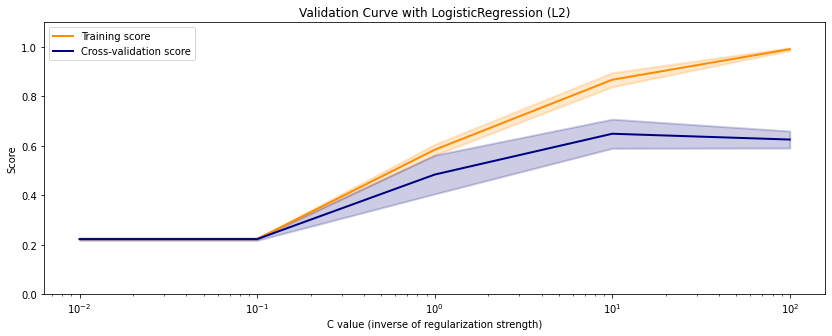

In [ ]:
param_range = [0.01, 0.1, 1, 10, 100]

train_scores, test_scores = validation_curve(
    LogisticRegression(max_iter=100000, random_state=0, penalty='l2', multi_class='ovr'),
    X_pit_train, y_pit_train, param_name="C", param_range=param_range, scoring="f1_macro")
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize = (14, 5))
plt.title("Validation Curve with LogisticRegression (L2)")
plt.xlabel("C value (inverse of regularization strength)")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
plt.xticks(param_range)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

In [ ]:
param_range[np.argmax(test_scores_mean)]

10

In [ ]:
log_reg_all_opt = LogisticRegression(penalty='l2', C=10, random_state=0, max_iter=10000, multi_class='ovr')
log_reg_all_opt.fit(X_pit_train, y_pit_train)

y_pred = log_reg_all_opt.predict(X_pit_test)
score = f1_score(y_pit_test, y_pred, average = 'macro')
print('Test F1 macro score:', score)

print('\nMost Important Features')
most_important_features(log_reg_all_opt, X_pit_train)

Test F1 macro score: 0.48989898989898983

Most Important Features
1
Positive
(5.602160142193394, 'Percent!!UNITS IN STRUCTURE!!Total housing units!!5 to 9 units_15')
(4.349017502619318, 'Percent!!UNITS IN STRUCTURE!!Total housing units!!3 or 4 units_15')
(3.4434305931866205, 'Percent!!HOUSE HEATING FUEL!!Occupied housing units!!Wood_15')
(2.1599899907259097, 'Percent!!YEAR STRUCTURE BUILT!!Total housing units!!Built 1939 or earlier_15')
(2.05505567948843, 'Percent!!HOUSE HEATING FUEL!!Occupied housing units!!Bottled, tank, or LP gas_15')
Negative
(-2.462637314881002, 'Percent!!RACE!!One race!!Some other race_15')
(-2.413625151307001, 'Percent!!VALUE!!Owner-occupied units!!$100,000 to $149,999_15')
(-2.366916362470801, 'Percent!!HOUSE HEATING FUEL!!Occupied housing units!!Fuel oil, kerosene, etc._15')
(-2.172009191748143, 'Percent!!RACE!!One race!!Asian!!Korean_15')
(-2.047606069447609, 'Percent!!UNITS IN STRUCTURE!!Total housing units!!20 or more units_15')

2
Positive
(3.0997675854226

In [ ]:
model = log_reg_all_opt

train_x = X_pit_train
test_x = X_pit_test

train_y = y_pit_train
test_y = y_pit_test

train_pred = model.predict(train_x)
test_pred = model.predict(test_x)

avp_train = pd.DataFrame(np.array([train_y, train_pred]).reshape(train_y.shape[0],2), index=train_y.index, columns=['Actual', 'Predict'])
avp_test = pd.DataFrame(np.array([test_y, test_pred]).reshape(test_y.shape[0],2), index=test_y.index, columns=['Actual', 'Predict'])

train_errors = avp_train[avp_train['Actual'] != avp_train['Predict']]
test_errors = avp_test[avp_test['Actual'] != avp_test['Predict']]

print('Train Errors')
for prof1 in [1, 2, 3]:
  for prof2 in [1, 2, 3]:
    if prof1 != prof2:
      count = train_errors[(train_errors['Actual'] == prof1) & (train_errors['Predict'] == prof2)].shape[0]
      rate = count / train_errors.shape[0]
      print(f'{prof1} -> {prof2}: {count} times, {rate:.1%} of total errors')

print('\nTest Errors')
for prof1 in [1, 2, 3]:
  for prof2 in [1, 2, 3]:
    if prof1 != prof2:
      count = test_errors[(test_errors['Actual'] == prof1) & (test_errors['Predict'] == prof2)].shape[0]
      rate = count / test_errors.shape[0]
      print(f'{prof1} -> {prof2}: {count} times, {rate:.1%} of total errors')

Train Errors
1 -> 2: 17 times, 18.1% of total errors
1 -> 3: 8 times, 8.5% of total errors
2 -> 1: 16 times, 17.0% of total errors
2 -> 3: 27 times, 28.7% of total errors
3 -> 1: 10 times, 10.6% of total errors
3 -> 2: 16 times, 17.0% of total errors

Test Errors
1 -> 2: 3 times, 30.0% of total errors
1 -> 3: 2 times, 20.0% of total errors
2 -> 1: 3 times, 30.0% of total errors
2 -> 3: 2 times, 20.0% of total errors
3 -> 1: 0 times, 0.0% of total errors
3 -> 2: 0 times, 0.0% of total errors


In [ ]:
print(classification_report(train_y, train_pred))

              precision    recall  f1-score   support

           1       0.94      0.87      0.91        39
           2       0.83      0.95      0.89        81
           3       0.88      0.69      0.77        42

    accuracy                           0.86       162
   macro avg       0.88      0.84      0.86       162
weighted avg       0.87      0.86      0.86       162



### Support Vector Machine

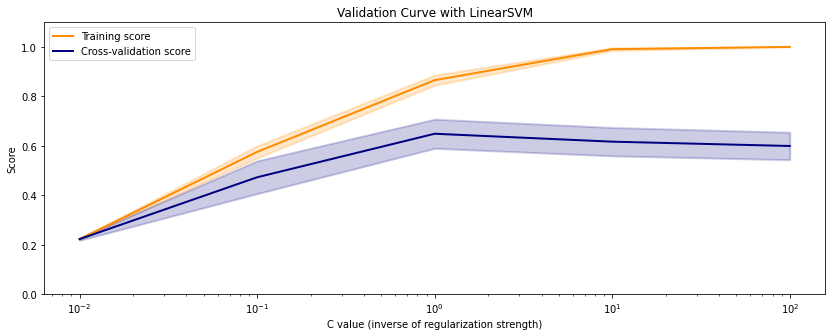

In [ ]:
param_range = [0.01, 0.1, 1, 10, 100]

train_scores, test_scores = validation_curve(
    LinearSVC(max_iter=100000, random_state=0, multi_class='ovr'), X_pit_train, y_pit_train, param_name="C", param_range=param_range, scoring="f1_macro")
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize = (14, 5))
plt.title("Validation Curve with LinearSVM")
plt.xlabel("C value (inverse of regularization strength)")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
plt.xticks(param_range)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

In [ ]:
param_range[np.argmax(test_scores_mean)]

1

In [ ]:
svm_all_opt = LogisticRegression(penalty='l2', C=1, random_state=0, max_iter=10000, multi_class='ovr')
svm_all_opt.fit(X_pit_train, y_pit_train)

y_pred = svm_all_opt.predict(X_pit_test)
score = f1_score(y_pit_test, y_pred, average = 'macro')
print('Test F1 macro score:', score)

print('\nMost Important Features')
most_important_features(svm_all_opt, X_pit_train)

Test F1 macro score: 0.4066666666666667

Most Important Features
1
Positive
(1.6480559442821512, 'Percent!!UNITS IN STRUCTURE!!Total housing units!!5 to 9 units_15')
(1.2754181571852392, 'Percent!!UNITS IN STRUCTURE!!Total housing units!!3 or 4 units_15')
(0.6164153025435074, 'Percent!!YEAR STRUCTURE BUILT!!Total housing units!!Built 1939 or earlier_15')
(0.5563070553704866, 'Percent!!VALUE!!Owner-occupied units!!$500,000 to $999,999_15')
(0.5537690127120432, 'Percent!!RACE!!One race!!American Indian and Alaska Native!!Navajo tribal grouping_15')
Negative
(-0.5798880710777208, 'Percent!!VALUE!!Owner-occupied units!!$100,000 to $149,999_15')
(-0.5515528582926127, 'Percent!!HOUSE HEATING FUEL!!Occupied housing units!!Fuel oil, kerosene, etc._15')
(-0.5343715830189559, 'Percent!!RACE!!One race!!Some other race_15')
(-0.5330183182008542, 'Percent!!UNITS IN STRUCTURE!!Total housing units!!20 or more units_15')
(-0.5012310933334497, 'Percent!!VALUE!!Owner-occupied units!!$300,000 to $499,999

In [ ]:
model = svm_all_opt

train_x = X_pit_train
test_x = X_pit_test

train_y = y_pit_train
test_y = y_pit_test

train_pred = model.predict(train_x)
test_pred = model.predict(test_x)

avp_train = pd.DataFrame(np.array([train_y, train_pred]).reshape(train_y.shape[0],2), index=train_y.index, columns=['Actual', 'Predict'])
avp_test = pd.DataFrame(np.array([test_y, test_pred]).reshape(test_y.shape[0],2), index=test_y.index, columns=['Actual', 'Predict'])

train_errors = avp_train[avp_train['Actual'] != avp_train['Predict']]
test_errors = avp_test[avp_test['Actual'] != avp_test['Predict']]

print('Train Errors')
for prof1 in [1, 2, 3]:
  for prof2 in [1, 2, 3]:
    if prof1 != prof2:
      count = train_errors[(train_errors['Actual'] == prof1) & (train_errors['Predict'] == prof2)].shape[0]
      rate = count / train_errors.shape[0]
      print(f'{prof1} -> {prof2}: {count} times, {rate:.1%} of total errors')

print('\nTest Errors')
for prof1 in [1, 2, 3]:
  for prof2 in [1, 2, 3]:
    if prof1 != prof2:
      count = test_errors[(test_errors['Actual'] == prof1) & (test_errors['Predict'] == prof2)].shape[0]
      rate = count / test_errors.shape[0]
      print(f'{prof1} -> {prof2}: {count} times, {rate:.1%} of total errors')

Train Errors
1 -> 2: 13 times, 16.0% of total errors
1 -> 3: 6 times, 7.4% of total errors
2 -> 1: 16 times, 19.8% of total errors
2 -> 3: 23 times, 28.4% of total errors
3 -> 1: 6 times, 7.4% of total errors
3 -> 2: 17 times, 21.0% of total errors

Test Errors
1 -> 2: 4 times, 50.0% of total errors
1 -> 3: 1 times, 12.5% of total errors
2 -> 1: 3 times, 37.5% of total errors
2 -> 3: 0 times, 0.0% of total errors
3 -> 1: 0 times, 0.0% of total errors
3 -> 2: 0 times, 0.0% of total errors


In [ ]:
print(classification_report(train_y, train_pred))

              precision    recall  f1-score   support

           1       1.00      0.36      0.53        39
           2       0.62      0.96      0.75        81
           3       0.77      0.40      0.53        42

    accuracy                           0.67       162
   macro avg       0.80      0.58      0.60       162
weighted avg       0.75      0.67      0.64       162



### Random Forest

#### Test n_estimators

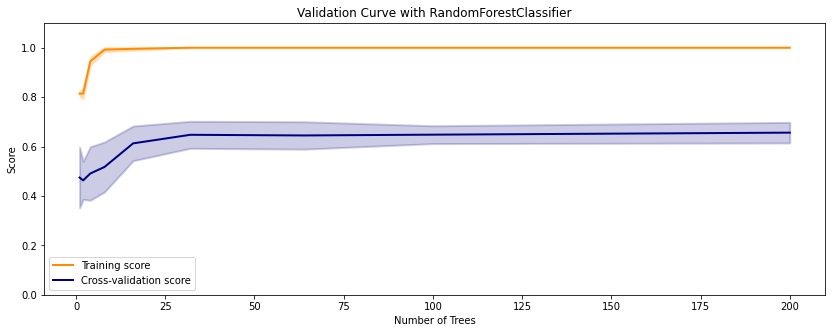

In [ ]:
param_range = [1, 2, 4, 8, 16, 32, 64, 100, 200]

train_scores, test_scores = validation_curve(
    RandomForestClassifier(random_state=0), X_pit_train, y_pit_train, param_name="n_estimators", param_range=param_range, scoring="f1_macro")
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize = (14, 5))
plt.title("Validation Curve with RandomForestClassifier")
plt.xlabel("Number of Trees")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
plt.xticks(param_range)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")

plt.xscale(value='linear')

plt.show()

In [ ]:
param_range[np.argmax(test_scores_mean)]

200

In [ ]:
print(sorted(list(zip(param_range,test_scores_mean)), key=lambda x: x[1], reverse = True))

[(200, 0.6562279812279812), (100, 0.6480627309574679), (32, 0.6475141177772757), (64, 0.6449547473231684), (16, 0.6128889039415355), (8, 0.517557780498957), (4, 0.49087843764314354), (1, 0.4745271472685834), (2, 0.4630290298426819)]


#### Test max_depth

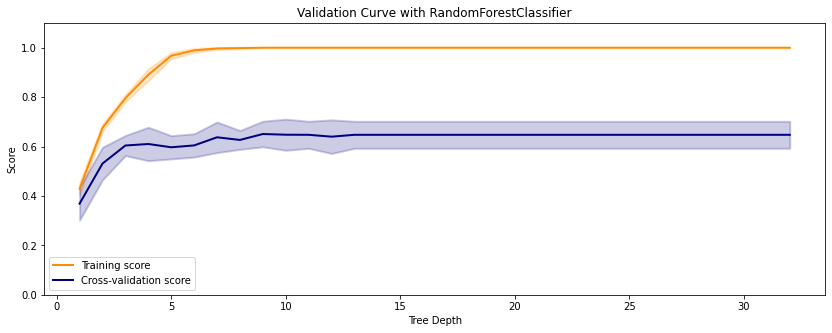

In [ ]:
param_range = np.linspace(1, 32, 32, endpoint=True)

train_scores, test_scores = validation_curve(
    RandomForestClassifier(n_estimators=32, random_state=0), X_pit_train, y_pit_train, param_name="max_depth", param_range=param_range, scoring="f1_macro")
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize = (14, 5))
plt.title("Validation Curve with RandomForestClassifier")
plt.xlabel("Tree Depth")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
plt.xticks(param_range)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")

plt.xscale(value='linear')

plt.show()

In [ ]:
param_range[np.argmax(test_scores_mean)]

9.0

In [ ]:
print(sorted(list(zip(param_range,test_scores_mean)), key=lambda x: x[1], reverse = True))

[(9.0, 0.6507129115023852), (10.0, 0.6478687102371313), (11.0, 0.6475141177772757), (13.0, 0.6475141177772757), (14.0, 0.6475141177772757), (15.0, 0.6475141177772757), (16.0, 0.6475141177772757), (17.0, 0.6475141177772757), (18.0, 0.6475141177772757), (19.0, 0.6475141177772757), (20.0, 0.6475141177772757), (21.0, 0.6475141177772757), (22.0, 0.6475141177772757), (23.0, 0.6475141177772757), (24.0, 0.6475141177772757), (25.0, 0.6475141177772757), (26.0, 0.6475141177772757), (27.0, 0.6475141177772757), (28.0, 0.6475141177772757), (29.0, 0.6475141177772757), (30.0, 0.6475141177772757), (31.0, 0.6475141177772757), (32.0, 0.6475141177772757), (12.0, 0.6399953207847945), (7.0, 0.6374888603835973), (8.0, 0.626738660422871), (4.0, 0.6103143876828088), (6.0, 0.6045434918654733), (3.0, 0.6042003524930355), (5.0, 0.5970627128521866), (2.0, 0.5311755644200341), (1.0, 0.36893573415312547)]


#### "Optimized" Model 

In [ ]:
rf_all_opt = RandomForestClassifier(n_estimators=32, max_depth=9, n_jobs=-1, random_state=0) # Removed min_samples_split and min_samples_leaf due to increased underfitting with increase in parameter values, removed max_features because it takes too long to optimize
rf_all_opt.fit(X_pit_train, y_pit_train)

y_pred = rf_all_opt.predict(X_pit_test)
score = f1_score(y_pit_test, y_pred, average = 'macro')
print('Test F1 macro score:', score)


Test F1 macro score: 0.5318840579710145


In [ ]:
important_features = zip(rf_all_opt.feature_importances_, X_pit_train.columns)

for tup in sorted(important_features, reverse=True, key = lambda x: x[0])[:10]:
  print(tup)

(0.054267190985984905, 'Percent!!UNITS IN STRUCTURE!!Total housing units!!5 to 9 units_15')
(0.027683985276367475, 'Percent!!UNITS IN STRUCTURE!!Total housing units!!3 or 4 units_15')
(0.019992698765131118, 'Percent!!YEAR STRUCTURE BUILT!!Total housing units!!Built 1939 or earlier_15')
(0.015009464768327348, 'Percent!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!9th to 12th grade, no diploma_15')
(0.014744622223459474, 'Percent!!SEX AND AGE!!65 years and over_15')
(0.01392330639868067, 'Percent!!RESIDENCE 1 YEAR AGO!!Population 1 year and over!!Different house in the U.S.!!Different county!!Same state_15')
(0.01378605164819915, 'Percent!!UNITS IN STRUCTURE!!Total housing units!!20 or more units_15')
(0.013653366881503617, 'Percent!!VALUE!!Owner-occupied units!!$500,000 to $999,999_15')
(0.012535681947700624, 'Percent!!VALUE!!Owner-occupied units!!$1,000,000 or more_15')
(0.012115994368349972, 'Percent!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Less than 9th grade_1

In [ ]:
model = rf_all_opt

train_x = X_pit_train
test_x = X_pit_test

train_y = y_pit_train
test_y = y_pit_test

train_pred = model.predict(train_x)
test_pred = model.predict(test_x)

avp_train = pd.DataFrame(np.array([train_y, train_pred]).reshape(train_y.shape[0],2), index=train_y.index, columns=['Actual', 'Predict'])
avp_test = pd.DataFrame(np.array([test_y, test_pred]).reshape(test_y.shape[0],2), index=test_y.index, columns=['Actual', 'Predict'])

train_errors = avp_train[avp_train['Actual'] != avp_train['Predict']]
test_errors = avp_test[avp_test['Actual'] != avp_test['Predict']]

print('Train Errors')
for prof1 in [1, 2, 3]:
  for prof2 in [1, 2, 3]:
    if prof1 != prof2:
      count = train_errors[(train_errors['Actual'] == prof1) & (train_errors['Predict'] == prof2)].shape[0]
      rate = count / train_errors.shape[0]
      print(f'{prof1} -> {prof2}: {count} times, {rate:.1%} of total errors')

print('\nTest Errors')
for prof1 in [1, 2, 3]:
  for prof2 in [1, 2, 3]:
    if prof1 != prof2:
      count = test_errors[(test_errors['Actual'] == prof1) & (test_errors['Predict'] == prof2)].shape[0]
      rate = count / test_errors.shape[0]
      print(f'{prof1} -> {prof2}: {count} times, {rate:.1%} of total errors')

Train Errors
1 -> 2: 18 times, 18.6% of total errors
1 -> 3: 8 times, 8.2% of total errors
2 -> 1: 16 times, 16.5% of total errors
2 -> 3: 27 times, 27.8% of total errors
3 -> 1: 12 times, 12.4% of total errors
3 -> 2: 16 times, 16.5% of total errors

Test Errors
1 -> 2: 4 times, 40.0% of total errors
1 -> 3: 1 times, 10.0% of total errors
2 -> 1: 3 times, 30.0% of total errors
2 -> 3: 2 times, 20.0% of total errors
3 -> 1: 0 times, 0.0% of total errors
3 -> 2: 0 times, 0.0% of total errors


In [ ]:
print(classification_report(train_y, train_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        39
           2       0.99      1.00      0.99        81
           3       1.00      0.98      0.99        42

    accuracy                           0.99       162
   macro avg       1.00      0.99      0.99       162
weighted avg       0.99      0.99      0.99       162



In [ ]:
list(train_errors.index)

## CAGR Data

### Logistic Regression

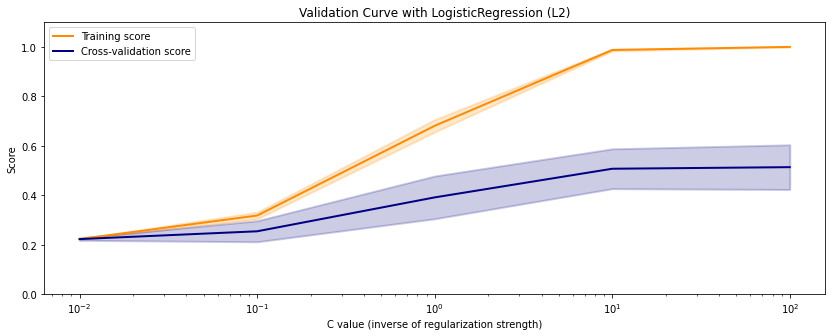

In [ ]:
param_range = [0.01, 0.1, 1, 10, 100]

train_scores, test_scores = validation_curve(
    LogisticRegression(max_iter=100000, random_state=0, penalty='l2', multi_class='ovr'),
    X_cagr_train, y_cagr_train, param_name="C", param_range=param_range, scoring="f1_macro")
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize = (14, 5))
plt.title("Validation Curve with LogisticRegression (L2)")
plt.xlabel("C value (inverse of regularization strength)")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
plt.xticks(param_range)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

In [ ]:
param_range[np.argmax(test_scores_mean)]

100

In [ ]:
log_reg_all_opt = LogisticRegression(penalty='l2', C=100, random_state=0, max_iter=10000, multi_class='ovr')
log_reg_all_opt.fit(X_cagr_train, y_cagr_train)

y_pred = log_reg_all_opt.predict(X_cagr_test)
score = f1_score(y_cagr_test, y_pred, average = 'macro')
print('Test F1 macro score:', score)

print('\nMost Important Features')
most_important_features(log_reg_all_opt, X_cagr_train)

Test F1 macro score: 0.3762626262626263

Most Important Features
1
Positive
(6.8460117870836195, 'Percent!!VALUE!!Owner-occupied units!!$150,000 to $199,999_cagr')
(6.776413085799382, 'Percent!!VALUE!!Owner-occupied units!!$1,000,000 or more_cagr')
(6.641371815945737, 'Percent!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Graduate or professional degree_cagr')
(6.173484985824968, 'Percent!!YEAR STRUCTURE BUILT!!Total housing units!!Built 1960 to 1969_cagr')
(6.008979813138911, 'Percent!!MARITAL STATUS!!Males 15 years and over!!Divorced_cagr')
Negative
(-6.018363968887879, 'Percent!!CLASS OF WORKER!!Civilian employed population 16 years and over!!Unpaid family workers_cagr')
(-5.391901003632611, 'Percent!!UNITS IN STRUCTURE!!Total housing units!!Mobile home_cagr')
(-5.36838477855473, 'Percent!!HOUSE HEATING FUEL!!Occupied housing units!!Coal or coke_cagr')
(-5.274638509753079, 'Percent!!YEAR STRUCTURE BUILT!!Total housing units!!Built 1940 to 1949_cagr')
(-5.101795372301817, 'P

In [ ]:
model = log_reg_all_opt

train_x = X_cagr_train
test_x = X_cagr_test

train_y = y_cagr_train
test_y = y_cagr_test

train_pred = model.predict(train_x)
test_pred = model.predict(test_x)

avp_train = pd.DataFrame(np.array([train_y, train_pred]).reshape(train_y.shape[0],2), index=train_y.index, columns=['Actual', 'Predict'])
avp_test = pd.DataFrame(np.array([test_y, test_pred]).reshape(test_y.shape[0],2), index=test_y.index, columns=['Actual', 'Predict'])

train_errors = avp_train[avp_train['Actual'] != avp_train['Predict']]
test_errors = avp_test[avp_test['Actual'] != avp_test['Predict']]

print('Train Errors')
for prof1 in [1, 2, 3]:
  for prof2 in [1, 2, 3]:
    if prof1 != prof2:
      count = train_errors[(train_errors['Actual'] == prof1) & (train_errors['Predict'] == prof2)].shape[0]
      rate = count / train_errors.shape[0]
      print(f'{prof1} -> {prof2}: {count} times, {rate:.1%} of total errors')

print('\nTest Errors')
for prof1 in [1, 2, 3]:
  for prof2 in [1, 2, 3]:
    if prof1 != prof2:
      count = test_errors[(test_errors['Actual'] == prof1) & (test_errors['Predict'] == prof2)].shape[0]
      rate = count / test_errors.shape[0]
      print(f'{prof1} -> {prof2}: {count} times, {rate:.1%} of total errors')

Train Errors
1 -> 2: 18 times, 18.4% of total errors
1 -> 3: 8 times, 8.2% of total errors
2 -> 1: 16 times, 16.3% of total errors
2 -> 3: 28 times, 28.6% of total errors
3 -> 1: 12 times, 12.2% of total errors
3 -> 2: 16 times, 16.3% of total errors

Test Errors
1 -> 2: 3 times, 30.0% of total errors
1 -> 3: 1 times, 10.0% of total errors
2 -> 1: 3 times, 30.0% of total errors
2 -> 3: 2 times, 20.0% of total errors
3 -> 1: 1 times, 10.0% of total errors
3 -> 2: 0 times, 0.0% of total errors


In [ ]:
list(train_errors['Predict'].values)

[2,
 1,
 3,
 3,
 1,
 1,
 3,
 1,
 3,
 2,
 2,
 2,
 2,
 3,
 2,
 3,
 1,
 3,
 3,
 1,
 3,
 2,
 1,
 1,
 1,
 2,
 3,
 3,
 1,
 2,
 3,
 1,
 3,
 2,
 1,
 1,
 2,
 2,
 2,
 1,
 3,
 2,
 3,
 3,
 2,
 2,
 3,
 3,
 2,
 2,
 1,
 3,
 3,
 1,
 1,
 3,
 1,
 3,
 2,
 2,
 2,
 2,
 3,
 2,
 3,
 1,
 3,
 3,
 1,
 3,
 2,
 1,
 1,
 1,
 2,
 3,
 3,
 1,
 2,
 3,
 1,
 3,
 2,
 1,
 1,
 2,
 2,
 2,
 1,
 3,
 2,
 3,
 3,
 2,
 2,
 3,
 3,
 2]

### Support Vector Machine

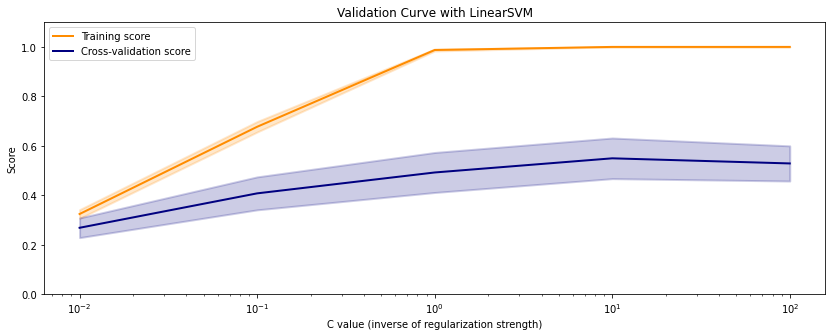

In [ ]:
param_range = [0.01, 0.1, 1, 10, 100]

train_scores, test_scores = validation_curve(
    LinearSVC(max_iter=100000, random_state=0, multi_class='ovr'), X_cagr_train, y_cagr_train, param_name="C", param_range=param_range, scoring="f1_macro")
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize = (14, 5))
plt.title("Validation Curve with LinearSVM")
plt.xlabel("C value (inverse of regularization strength)")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
plt.xticks(param_range)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

In [ ]:
param_range[np.argmax(test_scores_mean)]

10

In [ ]:
svm_all_opt = LogisticRegression(penalty='l2', C=10, random_state=0, max_iter=10000, multi_class='ovr')
svm_all_opt.fit(X_cagr_train, y_cagr_train)

y_pred = svm_all_opt.predict(X_cagr_test)
score = f1_score(y_cagr_test, y_pred, average = 'macro')
print('Test F1 macro score:', score)

print('\nMost Important Features')
most_important_features(svm_all_opt, X_cagr_train)

Test F1 macro score: 0.2896825396825397

Most Important Features
1
Positive
(3.311731406265256, 'Percent!!VALUE!!Owner-occupied units!!$150,000 to $199,999_cagr')
(3.0505255317664792, 'Percent!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Graduate or professional degree_cagr')
(2.8968870110834826, 'Percent!!VALUE!!Owner-occupied units!!$1,000,000 or more_cagr')
(2.8858870197490445, 'Percent!!PLACE OF BIRTH!!Total population!!Native!!Born in United States!!Different state_cagr')
(2.57028633244067, 'Percent!!MARITAL STATUS!!Males 15 years and over!!Divorced_cagr')
Negative
(-2.3930921463999804, 'Percent!!UNITS IN STRUCTURE!!Total housing units!!Mobile home_cagr')
(-2.3363196857903494, 'Percent!!CLASS OF WORKER!!Civilian employed population 16 years and over!!Unpaid family workers_cagr')
(-2.1642506391651204, 'Percent!!HOUSE HEATING FUEL!!Occupied housing units!!Coal or coke_cagr')
(-2.1460845181552513, 'Percent!!HOUSE HEATING FUEL!!Occupied housing units!!Utility gas_cagr')
(-2.

In [ ]:
model = svm_all_opt

train_x = X_cagr_train
test_x = X_cagr_test

train_y = y_cagr_train
test_y = y_cagr_test

train_pred = model.predict(train_x)
test_pred = model.predict(test_x)

avp_train = pd.DataFrame(np.array([train_y, train_pred]).reshape(train_y.shape[0],2), index=train_y.index, columns=['Actual', 'Predict'])
avp_test = pd.DataFrame(np.array([test_y, test_pred]).reshape(test_y.shape[0],2), index=test_y.index, columns=['Actual', 'Predict'])

train_errors = avp_train[avp_train['Actual'] != avp_train['Predict']]
test_errors = avp_test[avp_test['Actual'] != avp_test['Predict']]

print('Train Errors')
for prof1 in [1, 2, 3]:
  for prof2 in [1, 2, 3]:
    if prof1 != prof2:
      count = train_errors[(train_errors['Actual'] == prof1) & (train_errors['Predict'] == prof2)].shape[0]
      rate = count / train_errors.shape[0]
      print(f'{prof1} -> {prof2}: {count} times, {rate:.1%} of total errors')

print('\nTest Errors')
for prof1 in [1, 2, 3]:
  for prof2 in [1, 2, 3]:
    if prof1 != prof2:
      count = test_errors[(test_errors['Actual'] == prof1) & (test_errors['Predict'] == prof2)].shape[0]
      rate = count / test_errors.shape[0]
      print(f'{prof1} -> {prof2}: {count} times, {rate:.1%} of total errors')

Train Errors
1 -> 2: 18 times, 18.0% of total errors
1 -> 3: 8 times, 8.0% of total errors
2 -> 1: 16 times, 16.0% of total errors
2 -> 3: 30 times, 30.0% of total errors
3 -> 1: 12 times, 12.0% of total errors
3 -> 2: 16 times, 16.0% of total errors

Test Errors
1 -> 2: 3 times, 33.3% of total errors
1 -> 3: 1 times, 11.1% of total errors
2 -> 1: 3 times, 33.3% of total errors
2 -> 3: 2 times, 22.2% of total errors
3 -> 1: 0 times, 0.0% of total errors
3 -> 2: 0 times, 0.0% of total errors


In [ ]:
list(train_errors['Predict'].values)

[2,
 1,
 3,
 3,
 1,
 1,
 3,
 1,
 3,
 2,
 2,
 2,
 2,
 3,
 2,
 3,
 1,
 3,
 3,
 1,
 3,
 2,
 1,
 1,
 1,
 2,
 3,
 3,
 1,
 2,
 3,
 1,
 3,
 2,
 1,
 1,
 2,
 2,
 2,
 1,
 3,
 2,
 3,
 3,
 2,
 2,
 3,
 3,
 2,
 1,
 3,
 3,
 3,
 1,
 1,
 3,
 1,
 3,
 2,
 2,
 2,
 2,
 3,
 2,
 3,
 1,
 2,
 3,
 3,
 1,
 3,
 3,
 2,
 1,
 1,
 1,
 2,
 3,
 3,
 1,
 2,
 3,
 1,
 3,
 2,
 1,
 1,
 2,
 2,
 2,
 1,
 3,
 2,
 3,
 3,
 2,
 2,
 3,
 3,
 2]

### Random Forest

#### Test n_estimators

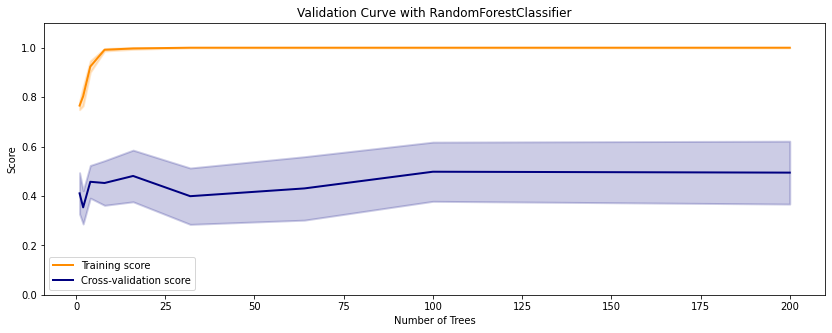

In [ ]:
param_range = [1, 2, 4, 8, 16, 32, 64, 100, 200]

train_scores, test_scores = validation_curve(
    RandomForestClassifier(random_state=0), X_cagr_train, y_cagr_train, param_name="n_estimators", param_range=param_range, scoring="f1_macro")
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize = (14, 5))
plt.title("Validation Curve with RandomForestClassifier")
plt.xlabel("Number of Trees")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
plt.xticks(param_range)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")

plt.xscale(value='linear')

plt.show()

In [ ]:
param_range[np.argmax(test_scores_mean)]

100

In [ ]:
print(sorted(list(zip(param_range,test_scores_mean)), key=lambda x: x[1], reverse = True))

[(100, 0.498109117411443), (200, 0.4944570033931736), (16, 0.48094606289728237), (4, 0.45738340950415246), (8, 0.45250949803581386), (64, 0.43055032198916593), (1, 0.4105930434930718), (32, 0.39909349048883935), (2, 0.35384161072030373)]


#### Test max_depth

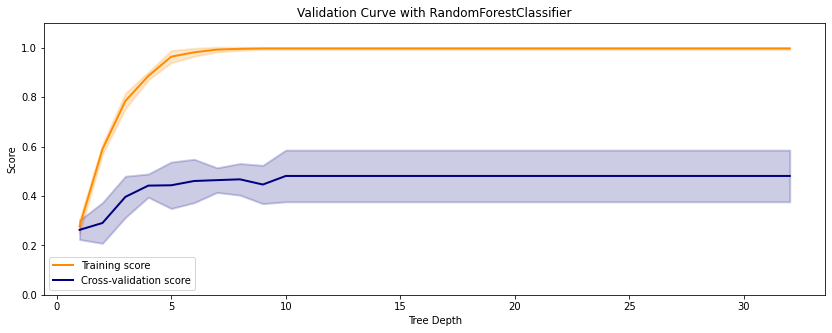

In [ ]:
param_range = np.linspace(1, 32, 32, endpoint=True)

train_scores, test_scores = validation_curve(
    RandomForestClassifier(n_estimators=16, random_state=0), X_cagr_train, y_cagr_train, param_name="max_depth", param_range=param_range, scoring="f1_macro")
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize = (14, 5))
plt.title("Validation Curve with RandomForestClassifier")
plt.xlabel("Tree Depth")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
plt.xticks(param_range)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")

plt.xscale(value='linear')

plt.show()

In [ ]:
param_range[np.argmax(test_scores_mean)]

10.0

In [ ]:
print(sorted(list(zip(param_range,test_scores_mean)), key=lambda x: x[1], reverse = True))

[(10.0, 0.48094606289728237), (11.0, 0.48094606289728237), (12.0, 0.48094606289728237), (13.0, 0.48094606289728237), (14.0, 0.48094606289728237), (15.0, 0.48094606289728237), (16.0, 0.48094606289728237), (17.0, 0.48094606289728237), (18.0, 0.48094606289728237), (19.0, 0.48094606289728237), (20.0, 0.48094606289728237), (21.0, 0.48094606289728237), (22.0, 0.48094606289728237), (23.0, 0.48094606289728237), (24.0, 0.48094606289728237), (25.0, 0.48094606289728237), (26.0, 0.48094606289728237), (27.0, 0.48094606289728237), (28.0, 0.48094606289728237), (29.0, 0.48094606289728237), (30.0, 0.48094606289728237), (31.0, 0.48094606289728237), (32.0, 0.48094606289728237), (8.0, 0.4673276682352122), (7.0, 0.46409257409257404), (6.0, 0.4605950053245918), (9.0, 0.4463095896561581), (5.0, 0.4432650725673982), (4.0, 0.4418851781188707), (3.0, 0.3963841311667399), (2.0, 0.29066967859289783), (1.0, 0.26279667422524566)]


#### "Optimized" Model 

In [ ]:
rf_all_opt = RandomForestClassifier(n_estimators=16, max_depth=10, n_jobs=-1, random_state=0) # Removed min_samples_split and min_samples_leaf due to increased underfitting with increase in parameter values, removed max_features because it takes too long to optimize
rf_all_opt.fit(X_cagr_train, y_cagr_train)

y_pred = rf_all_opt.predict(X_cagr_test)
score = f1_score(y_cagr_test, y_pred, average = 'macro')
print('Test F1 macro score:', score)


Test F1 macro score: 0.6119047619047618


In [ ]:
important_features = zip(rf_all_opt.feature_importances_, X_cagr_train.columns)

for tup in sorted(important_features, reverse=True, key = lambda x: x[0])[:10]:
  print(tup)

(0.028762350370777248, 'Percent!!SEX AND AGE!!Under 5 years_cagr')
(0.02085733148779902, 'Percent!!RACE!!Two or more races!!White and Asian_cagr')
(0.019553735575840663, 'Percent!!ROOMS!!Total housing units!!5 rooms_cagr')
(0.01760492705041255, 'Percent!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Graduate or professional degree_cagr')
(0.01565554744185565, 'Percent!!PLACE OF BIRTH!!Total population!!Native!!Born in United States!!Different state_cagr')
(0.014100905224996857, 'Percent!!RELATIONSHIP!!Population in households!!Nonrelatives_cagr')
(0.014021046196730507, 'Percent!!MARITAL STATUS!!Females 15 years and over!!Now married, except separated_cagr')
(0.013715605100962553, 'Percent!!OCCUPATION!!Civilian employed population 16 years and over!!Management, business, science, and arts occupations_cagr')
(0.012588391799983358, 'Percent!!MORTGAGE STATUS!!Owner-occupied units!!Housing units with a mortgage_cagr')
(0.011936510616721978, 'Percent!!SELECTED MONTHLY OWNER COSTS AS 

In [ ]:
model = rf_all_opt

train_x = X_cagr_train
test_x = X_cagr_test

train_y = y_cagr_train
test_y = y_cagr_test

train_pred = model.predict(train_x)
test_pred = model.predict(test_x)

avp_train = pd.DataFrame(np.array([train_y, train_pred]).reshape(train_y.shape[0],2), index=train_y.index, columns=['Actual', 'Predict'])
avp_test = pd.DataFrame(np.array([test_y, test_pred]).reshape(test_y.shape[0],2), index=test_y.index, columns=['Actual', 'Predict'])

train_errors = avp_train[avp_train['Actual'] != avp_train['Predict']]
test_errors = avp_test[avp_test['Actual'] != avp_test['Predict']]

print('Train Errors')
for prof1 in [1, 2, 3]:
  for prof2 in [1, 2, 3]:
    if prof1 != prof2:
      count = train_errors[(train_errors['Actual'] == prof1) & (train_errors['Predict'] == prof2)].shape[0]
      rate = count / train_errors.shape[0]
      print(f'{prof1} -> {prof2}: {count} times, {rate:.1%} of total errors')

print('\nTest Errors')
for prof1 in [1, 2, 3]:
  for prof2 in [1, 2, 3]:
    if prof1 != prof2:
      count = test_errors[(test_errors['Actual'] == prof1) & (test_errors['Predict'] == prof2)].shape[0]
      rate = count / test_errors.shape[0]
      print(f'{prof1} -> {prof2}: {count} times, {rate:.1%} of total errors')

Train Errors
1 -> 2: 18 times, 18.4% of total errors
1 -> 3: 8 times, 8.2% of total errors
2 -> 1: 16 times, 16.3% of total errors
2 -> 3: 28 times, 28.6% of total errors
3 -> 1: 12 times, 12.2% of total errors
3 -> 2: 16 times, 16.3% of total errors

Test Errors
1 -> 2: 3 times, 33.3% of total errors
1 -> 3: 1 times, 11.1% of total errors
2 -> 1: 3 times, 33.3% of total errors
2 -> 3: 2 times, 22.2% of total errors
3 -> 1: 0 times, 0.0% of total errors
3 -> 2: 0 times, 0.0% of total errors


In [ ]:
list(train_errors['Actual'].values)

[1,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 1,
 3,
 1,
 3,
 1,
 1,
 3,
 2,
 2,
 2,
 2,
 3,
 2,
 1,
 2,
 3,
 3,
 1,
 2,
 2,
 2,
 1,
 1,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 2,
 1,
 2,
 2,
 3,
 1,
 1,
 2,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 1,
 3,
 1,
 3,
 1,
 1,
 3,
 2,
 2,
 2,
 2,
 3,
 2,
 1,
 2,
 3,
 3,
 1,
 2,
 2,
 2,
 1,
 1,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 2,
 1,
 2,
 2,
 3,
 1,
 1,
 2,
 1]

# Modeling (Reduced Column Space)

## Point-in-Time Data

### Feature Selection - SelectKBest

In [ ]:
X_pit_train_dfs = []
X_pit_test_dfs = []
num_feat_kb = []

for k in range(10, X_pit_train.shape[1], 10):
  num_feat_kb.append(k)
  kBest = SelectKBest(chi2, k)
  kBest.fit(X_pit_train, y_pit_train)
  k_best_col_idx = kBest.get_support(indices=True)
  k_best_cols = []
  for idx in k_best_col_idx:
    k_best_cols.append(list(X_pit_train.columns)[idx])
  X_pit_train_dfs.append(X_pit_train[k_best_cols])
  X_pit_test_dfs.append(X_pit_test[k_best_cols])

X_pit_train_test_dfs = list(zip(X_pit_train_dfs, X_pit_test_dfs))

#### Logistic Regression

(300, 0.8574174174174174)
(310, 0.48989898989898983)


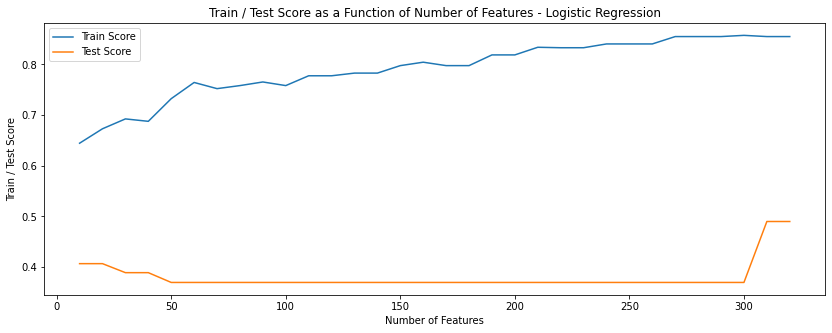

In [ ]:
# Instantiate model based on all-column parameter tuning
log_reg_select = LogisticRegression(penalty='l2', C=10, random_state=0, max_iter=10000, multi_class='ovr')

train_scores = []
test_scores = []
indices = []

idx = 0

for train, test in X_pit_train_test_dfs:
  indices.append(idx)
  log_reg_select.fit(train, y_pit_train)
  train_scores.append(f1_score(y_pit_train, log_reg_select.predict(train), average='macro'))
  test_scores.append(f1_score(y_pit_test, log_reg_select.predict(test), average='macro'))

  idx += 1

num_feat_kb_train_scores = zip(num_feat_kb, train_scores)
num_feat_kb_test_scores = zip(num_feat_kb, test_scores)


print(max(num_feat_kb_train_scores, key = lambda x: x[1]))
print(max(num_feat_kb_test_scores, key = lambda x: x[1]))

plt.figure(figsize = (14, 5))
plt.plot(num_feat_kb, train_scores, label='Train Score')
plt.plot(num_feat_kb, test_scores, label='Test Score')
plt.xlabel('Number of Features')
plt.ylabel('Train / Test Score')
plt.title('Train / Test Score as a Function of Number of Features - Logistic Regression')
plt.legend()
plt.axis('tight')
plt.show()

In [ ]:
print(sorted(list(zip(indices, num_feat_kb, test_scores)), key=lambda x: x[2], reverse = True))

[(30, 310, 0.48989898989898983), (31, 320, 0.48989898989898983), (0, 10, 0.4066666666666667), (1, 20, 0.4066666666666667), (2, 30, 0.3888888888888889), (3, 40, 0.3888888888888889), (4, 50, 0.3695652173913044), (5, 60, 0.3695652173913044), (6, 70, 0.3695652173913044), (7, 80, 0.3695652173913044), (8, 90, 0.3695652173913044), (9, 100, 0.3695652173913044), (10, 110, 0.3695652173913044), (11, 120, 0.3695652173913044), (12, 130, 0.3695652173913044), (13, 140, 0.3695652173913044), (14, 150, 0.3695652173913044), (15, 160, 0.3695652173913044), (16, 170, 0.3695652173913044), (17, 180, 0.3695652173913044), (18, 190, 0.3695652173913044), (19, 200, 0.3695652173913044), (20, 210, 0.3695652173913044), (21, 220, 0.3695652173913044), (22, 230, 0.3695652173913044), (23, 240, 0.3695652173913044), (24, 250, 0.3695652173913044), (25, 260, 0.3695652173913044), (26, 270, 0.3695652173913044), (27, 280, 0.3695652173913044), (28, 290, 0.3695652173913044), (29, 300, 0.3695652173913044)]


In [ ]:
opt_idx = 30

log_reg_select_opt = LogisticRegression(penalty='l2', C=10, random_state=0, max_iter=10000, multi_class='ovr')

opt_train = X_pit_train_test_dfs[opt_idx][0]
opt_test = X_pit_train_test_dfs[opt_idx][1]

log_reg_select_opt.fit(opt_train, y_pit_train)

y_pred = log_reg_select_opt.predict(opt_test)
score = f1_score(y_pit_test, y_pred, average = 'macro')
print('Test F1 macro score:', score)

print('\nMost Important Features')
most_important_features(log_reg_select_opt, opt_train)

Test F1 macro score: 0.48989898989898983

Most Important Features
1
Positive
(5.615559501130885, 'Percent!!UNITS IN STRUCTURE!!Total housing units!!5 to 9 units_15')
(4.348761157544394, 'Percent!!UNITS IN STRUCTURE!!Total housing units!!3 or 4 units_15')
(3.4465329891612297, 'Percent!!HOUSE HEATING FUEL!!Occupied housing units!!Wood_15')
(2.160132765205894, 'Percent!!YEAR STRUCTURE BUILT!!Total housing units!!Built 1939 or earlier_15')
(2.0682538526705136, 'Percent!!HOUSE HEATING FUEL!!Occupied housing units!!Bottled, tank, or LP gas_15')
Negative
(-2.4708586684104787, 'Percent!!RACE!!One race!!Some other race_15')
(-2.4195353567437525, 'Percent!!VALUE!!Owner-occupied units!!$100,000 to $149,999_15')
(-2.370501764864314, 'Percent!!HOUSE HEATING FUEL!!Occupied housing units!!Fuel oil, kerosene, etc._15')
(-2.1692368766431804, 'Percent!!RACE!!One race!!Asian!!Korean_15')
(-2.051429845654493, 'Percent!!UNITS IN STRUCTURE!!Total housing units!!20 or more units_15')

2
Positive
(3.092122113

#### Support Vector Machine

(300, 0.850814307458143)
(320, 0.48989898989898983)


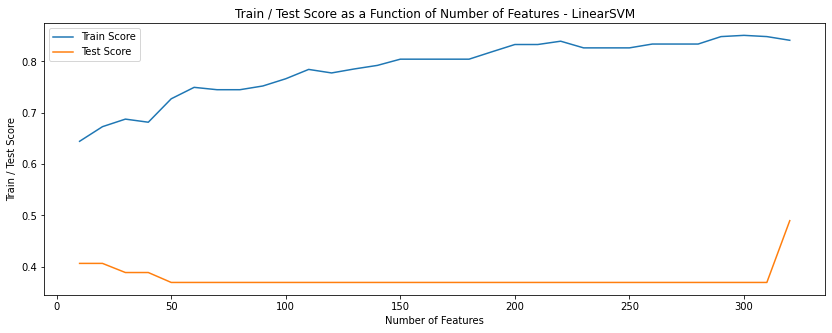

In [ ]:
# Instantiate model based on all-column parameter tuning
svm_select = LinearSVC(C=1, multi_class='ovr', random_state=0, max_iter=10000)

train_scores = []
test_scores = []
indices = []

idx = 0

for train, test in X_pit_train_test_dfs:
  indices.append(idx)
  svm_select.fit(train, y_pit_train)
  train_scores.append(f1_score(y_pit_train, svm_select.predict(train), average='macro'))
  test_scores.append(f1_score(y_pit_test, svm_select.predict(test), average='macro'))
  idx += 1

num_feat_kb_train_scores = zip(num_feat_kb, train_scores)
num_feat_kb_test_scores = zip(num_feat_kb, test_scores)


print(max(num_feat_kb_train_scores, key = lambda x: x[1]))
print(max(num_feat_kb_test_scores, key = lambda x: x[1]))

plt.figure(figsize = (14, 5))
plt.plot(num_feat_kb, train_scores, label='Train Score')
plt.plot(num_feat_kb, test_scores, label='Test Score')
plt.xlabel('Number of Features')
plt.ylabel('Train / Test Score')
plt.title('Train / Test Score as a Function of Number of Features - LinearSVM')
plt.legend()
plt.axis('tight')
plt.show()

In [ ]:
print(sorted(list(zip(indices, num_feat_kb, test_scores)), key=lambda x: x[2], reverse = True))

[(31, 320, 0.48989898989898983), (0, 10, 0.4066666666666667), (1, 20, 0.4066666666666667), (2, 30, 0.3888888888888889), (3, 40, 0.3888888888888889), (4, 50, 0.3695652173913044), (5, 60, 0.3695652173913044), (6, 70, 0.3695652173913044), (7, 80, 0.3695652173913044), (8, 90, 0.3695652173913044), (9, 100, 0.3695652173913044), (10, 110, 0.3695652173913044), (11, 120, 0.3695652173913044), (12, 130, 0.3695652173913044), (13, 140, 0.3695652173913044), (14, 150, 0.3695652173913044), (15, 160, 0.3695652173913044), (16, 170, 0.3695652173913044), (17, 180, 0.3695652173913044), (18, 190, 0.3695652173913044), (19, 200, 0.3695652173913044), (20, 210, 0.3695652173913044), (21, 220, 0.3695652173913044), (22, 230, 0.3695652173913044), (23, 240, 0.3695652173913044), (24, 250, 0.3695652173913044), (25, 260, 0.3695652173913044), (26, 270, 0.3695652173913044), (27, 280, 0.3695652173913044), (28, 290, 0.3695652173913044), (29, 300, 0.3695652173913044), (30, 310, 0.3695652173913044)]


In [ ]:
opt_idx = 12

svm_select_opt = LinearSVC(C=0.1, multi_class='ovr', random_state=0, max_iter=10000)

opt_train = X_pit_train_test_dfs[opt_idx][0]
opt_test = X_pit_train_test_dfs[opt_idx][1]

svm_select_opt.fit(opt_train, y_pit_train)

y_pred = svm_select_opt.predict(opt_test)
score = f1_score(y_pit_test, y_pred, average = 'macro')
print('Test F1 macro score:', score)

print('\nMost Important Features')
most_important_features(svm_select_opt, opt_train)

Test F1 macro score: 0.326007326007326

Most Important Features
1
Positive
(0.6794522283301317, 'Percent!!UNITS IN STRUCTURE!!Total housing units!!5 to 9 units_15')
(0.5163047905687622, 'Percent!!UNITS IN STRUCTURE!!Total housing units!!3 or 4 units_15')
(0.2258900543860148, 'Percent!!YEAR STRUCTURE BUILT!!Total housing units!!Built 1939 or earlier_15')
(0.21331767000057442, 'Percent!!RACE!!One race!!American Indian and Alaska Native!!Navajo tribal grouping_15')
(0.20478027655424552, 'Percent!!VALUE!!Owner-occupied units!!$500,000 to $999,999_15')
Negative
(-0.26945723756347123, 'Percent!!HOUSE HEATING FUEL!!Occupied housing units!!Fuel oil, kerosene, etc._15')
(-0.25102976540193817, 'Percent!!VALUE!!Owner-occupied units!!$100,000 to $149,999_15')
(-0.2508612210576503, 'Percent!!UNITS IN STRUCTURE!!Total housing units!!20 or more units_15')
(-0.24607349067188775, 'Percent!!RACE!!One race!!Some other race_15')
(-0.23919342671907998, 'Percent!!VALUE!!Owner-occupied units!!$300,000 to $49

#### Random Forest

(10, 1.0)
(190, 0.5925925925925926)


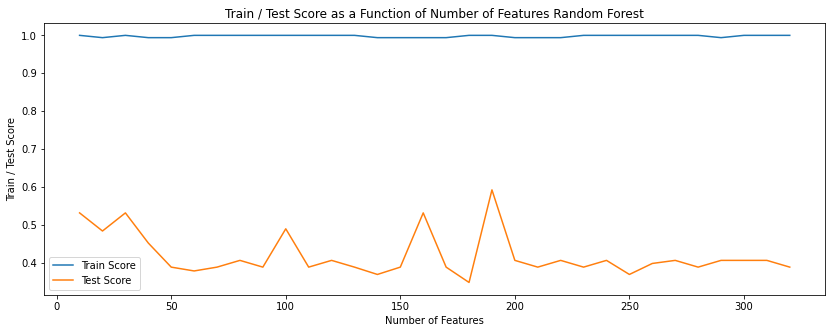

In [ ]:
# Instantiate model based on all-column parameter tuning
rf_select = RandomForestClassifier(n_estimators=32, max_depth=9, n_jobs=-1, random_state=0)

train_scores = []
test_scores = []
indices = []

idx = 0

for train, test in X_pit_train_test_dfs:
  indices.append(idx)
  rf_select.fit(train, y_pit_train)
  train_scores.append(f1_score(y_pit_train, rf_select.predict(train), average='macro'))
  test_scores.append(f1_score(y_pit_test, rf_select.predict(test), average='macro'))
  idx += 1

num_feat_kb_train_scores = zip(num_feat_kb, train_scores)
num_feat_kb_test_scores = zip(num_feat_kb, test_scores)


print(max(num_feat_kb_train_scores, key = lambda x: x[1]))
print(max(num_feat_kb_test_scores, key = lambda x: x[1]))

plt.figure(figsize = (14, 5))
plt.plot(num_feat_kb, train_scores, label='Train Score')
plt.plot(num_feat_kb, test_scores, label='Test Score')
plt.xlabel('Number of Features')
plt.ylabel('Train / Test Score')
plt.title('Train / Test Score as a Function of Number of Features Random Forest')
plt.legend()
plt.axis('tight')
plt.show()

In [ ]:
print(sorted(list(zip(indices, num_feat_kb, test_scores)), key=lambda x: x[2], reverse = True))

[(18, 190, 0.5925925925925926), (0, 10, 0.5318840579710145), (2, 30, 0.5318840579710145), (15, 160, 0.5318840579710145), (9, 100, 0.48989898989898983), (1, 20, 0.48412698412698413), (3, 40, 0.4523809523809525), (7, 80, 0.4066666666666667), (11, 120, 0.4066666666666667), (19, 200, 0.4066666666666667), (21, 220, 0.4066666666666667), (23, 240, 0.4066666666666667), (26, 270, 0.4066666666666667), (28, 290, 0.4066666666666667), (29, 300, 0.4066666666666667), (30, 310, 0.4066666666666667), (25, 260, 0.39855072463768115), (4, 50, 0.3888888888888889), (6, 70, 0.3888888888888889), (8, 90, 0.3888888888888889), (10, 110, 0.3888888888888889), (12, 130, 0.3888888888888889), (14, 150, 0.3888888888888889), (16, 170, 0.3888888888888889), (20, 210, 0.3888888888888889), (22, 230, 0.3888888888888889), (27, 280, 0.3888888888888889), (31, 320, 0.3888888888888889), (5, 60, 0.37878787878787873), (13, 140, 0.3695652173913044), (24, 250, 0.3695652173913044), (17, 180, 0.34848484848484845)]


In [ ]:
opt_idx = 14

rf_select_opt = RandomForestClassifier(n_estimators=16, max_depth=4, n_jobs=-1, random_state=0)

opt_train = X_pit_train_test_dfs[opt_idx][0]
opt_test = X_pit_train_test_dfs[opt_idx][1]

rf_select_opt.fit(opt_train, y_pit_train)

y_pred = rf_select_opt.predict(opt_test)
score = f1_score(y_pit_test, y_pred, average = 'macro')
print('Test F1 macro score:', score)

print('\nMost Important Features')
important_features = zip(rf_select_opt.feature_importances_, opt_train.columns)

for tup in sorted(important_features, reverse=True, key = lambda x: x[0])[:10]:
  print(tup)

Test F1 macro score: 0.5833333333333334

Most Important Features
(0.058970085531147534, 'Percent!!UNITS IN STRUCTURE!!Total housing units!!5 to 9 units_15')
(0.04855922206995783, 'Percent!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Less than 9th grade_15')
(0.04302008418047095, 'Percent!!SEX AND AGE!!15 to 19 years_15')
(0.03063543172364286, 'Percent!!UNITS IN STRUCTURE!!Total housing units!!3 or 4 units_15')
(0.02884369745716634, 'Percent!!ROOMS!!Total housing units!!3 rooms_15')
(0.026113727531434476, 'Percent!!UNITS IN STRUCTURE!!Total housing units!!2 units_15')
(0.026076333656130202, 'Percent!!INCOME AND BENEFITS (IN _ INFLATION-ADJUSTED DOLLARS)!!Total households!!$200,000 or more_15')
(0.025913987526718255, 'Percent!!UNITS IN STRUCTURE!!Total housing units!!20 or more units_15')
(0.024353567317488226, 'Percent!!COMMUTING TO WORK!!Workers 16 years and over!!Car, truck, or van -- drove alone_15')
(0.02260981348945857, 'Percent!!YEAR STRUCTURE BUILT!!Total housing units!

In [ ]:
model = rf_select_opt

train_x = opt_train
test_x = opt_test

train_y = y_pit_train
test_y = y_pit_test

train_pred = model.predict(train_x)
test_pred = model.predict(test_x)



avp_train = pd.DataFrame(np.array([train_y, train_pred]).reshape(train_y.shape[0],2), index=train_y.index, columns=['Actual', 'Predict'])
avp_test = pd.DataFrame(np.array([test_y, test_pred]).reshape(test_y.shape[0],2), index=test_y.index, columns=['Actual', 'Predict'])

print(avp_train.shape)

train_errors = avp_train[avp_train['Actual'] != avp_train['Predict']]
test_errors = avp_test[avp_test['Actual'] != avp_test['Predict']]

print('Train Errors')
for prof1 in [1, 2, 3]:
  for prof2 in [1, 2, 3]:
    if prof1 != prof2:
      count = train_errors[(train_errors['Actual'] == prof1) & (train_errors['Predict'] == prof2)].shape[0]
      rate = count / train_errors.shape[0]
      print(f'{prof1} -> {prof2}: {count} times, {rate:.1%} of total errors')

print('\nTest Errors')
for prof1 in [1, 2, 3]:
  for prof2 in [1, 2, 3]:
    if prof1 != prof2:
      count = test_errors[(test_errors['Actual'] == prof1) & (test_errors['Predict'] == prof2)].shape[0]
      rate = count / test_errors.shape[0]
      print(f'{prof1} -> {prof2}: {count} times, {rate:.1%} of total errors')

(162, 2)
Train Errors
1 -> 2: 20 times, 22.0% of total errors
1 -> 3: 6 times, 6.6% of total errors
2 -> 1: 17 times, 18.7% of total errors
2 -> 3: 24 times, 26.4% of total errors
3 -> 1: 10 times, 11.0% of total errors
3 -> 2: 14 times, 15.4% of total errors

Test Errors
1 -> 2: 4 times, 44.4% of total errors
1 -> 3: 1 times, 11.1% of total errors
2 -> 1: 3 times, 33.3% of total errors
2 -> 3: 1 times, 11.1% of total errors
3 -> 1: 0 times, 0.0% of total errors
3 -> 2: 0 times, 0.0% of total errors


### Dimensionality Reduction - PCA

In [ ]:
pit_dfs = []
num_feat_pca = []
pca_components = []
pca_exp_var = []

for n in range(5, X_pit.shape[0], 5):
  num_feat_pca.append(n)
  pca = PCA(n, random_state=0)
  X_pit_reduced = pca.fit_transform(X_pit, y_pit)
  pca_components.append(pca.components_)
  pca_exp_var.append(pca.explained_variance_ratio_)
  X_pit_reduced_train, X_pit_reduced_test, y_pit_train, y_pit_test = train_test_split(X_pit_reduced, y_pit, test_size=test_size, random_state=0) 
  pit_dfs.append((X_pit_reduced_train, X_pit_reduced_test, y_pit_train, y_pit_test))

#### Logistic Regression

(105, 0.8550191570881226)
(55, 0.48989898989898983)


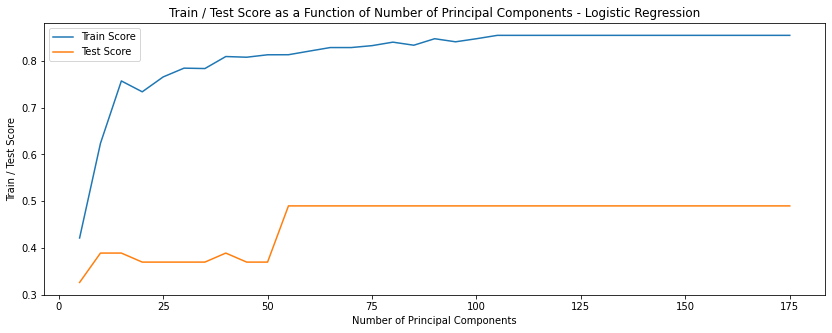

In [ ]:
# Instantiate model based on all-column parameter tuning
log_reg_reduce = LogisticRegression(penalty='l2', C=10, random_state=0, max_iter=10000, multi_class='ovr')

train_scores = []
test_scores = []
indices = []

idx = 0

for X_pit_reduced_train, X_pit_reduced_test, y_pit_train, y_pit_test in pit_dfs:
  indices.append(idx)
  log_reg_reduce.fit(X_pit_reduced_train, y_pit_train)
  train_scores.append(f1_score(y_pit_train, log_reg_reduce.predict(X_pit_reduced_train), average='macro'))
  test_scores.append(f1_score(y_pit_test, log_reg_reduce.predict(X_pit_reduced_test), average='macro'))
  idx += 1

num_feat_pca_train_scores = zip(num_feat_pca, train_scores)
num_feat_pca_test_scores = zip(num_feat_pca, test_scores)

print(max(num_feat_pca_train_scores, key = lambda x: x[1]))
print(max(num_feat_pca_test_scores, key = lambda x: x[1]))

plt.figure(figsize = (14, 5))
plt.plot(num_feat_pca, train_scores, label='Train Score')
plt.plot(num_feat_pca, test_scores, label='Test Score')
plt.xlabel('Number of Principal Components')
plt.ylabel('Train / Test Score')
plt.title('Train / Test Score as a Function of Number of Principal Components - Logistic Regression')
plt.legend()
plt.axis('tight')
plt.show()

In [ ]:
print(sorted(list(zip(indices, num_feat_pca, test_scores)), key=lambda x: x[2], reverse = True))

[(10, 55, 0.48989898989898983), (11, 60, 0.48989898989898983), (12, 65, 0.48989898989898983), (13, 70, 0.48989898989898983), (14, 75, 0.48989898989898983), (15, 80, 0.48989898989898983), (16, 85, 0.48989898989898983), (17, 90, 0.48989898989898983), (18, 95, 0.48989898989898983), (19, 100, 0.48989898989898983), (20, 105, 0.48989898989898983), (21, 110, 0.48989898989898983), (22, 115, 0.48989898989898983), (23, 120, 0.48989898989898983), (24, 125, 0.48989898989898983), (25, 130, 0.48989898989898983), (26, 135, 0.48989898989898983), (27, 140, 0.48989898989898983), (28, 145, 0.48989898989898983), (29, 150, 0.48989898989898983), (30, 155, 0.48989898989898983), (31, 160, 0.48989898989898983), (32, 165, 0.48989898989898983), (33, 170, 0.48989898989898983), (34, 175, 0.48989898989898983), (1, 10, 0.3888888888888889), (2, 15, 0.3888888888888889), (7, 40, 0.3888888888888889), (3, 20, 0.3695652173913044), (4, 25, 0.3695652173913044), (5, 30, 0.3695652173913044), (6, 35, 0.3695652173913044), (8, 4

In [ ]:
opt_idx = 0

log_reg_reduce_opt = LogisticRegression(penalty='l2', C=10, random_state=0, max_iter=10000, multi_class='ovr')

opt_train = pit_dfs[opt_idx][0]
opt_test = pit_dfs[opt_idx][1]

log_reg_reduce_opt.fit(opt_train, y_pit_train)

y_pred = log_reg_reduce_opt.predict(opt_test)
score = f1_score(y_pit_test, y_pred, average = 'macro')
print('Test F1 macro score:', score)

Test F1 macro score: 0.326007326007326


In [ ]:
components = pd.DataFrame(pca_components[opt_idx], columns=X_pit.columns)
component_correlations = {}
for idx in components.index:
  component_correlations[idx] = list(zip(components.columns, components.iloc[idx].values))

for idx in component_correlations:
  top_features = sorted(component_correlations[idx], key=lambda x: np.abs(x[1]), reverse = True)[:10]
  print('\n')
  print('Component', idx, ':', pca_exp_var[opt_idx][idx])
  for feature in top_features:
    print(feature[0], ':', feature[1])



Component 0 : 0.20246358944936518
Percent!!INCOME AND BENEFITS (IN _ INFLATION-ADJUSTED DOLLARS)!!Families!!$200,000 or more_15 : 0.15139441278347693
Percent!!INCOME AND BENEFITS (IN _ INFLATION-ADJUSTED DOLLARS)!!Total households!!$200,000 or more_15 : 0.1459829788688736
Percent!!VALUE!!Owner-occupied units!!$1,000,000 or more_15 : 0.1257633758343935
Percent!!RACE!!One race!!Asian!!Japanese_15 : 0.12445056734827156
Percent!!WORLD REGION OF BIRTH OF FOREIGN BORN!!Foreign-born population, excluding population born at sea!!Oceania_15 : 0.1221322776568299
Percent!!GRANDPARENTS!!Number of grandparents responsible for own grandchildren under 18 years_15 : -0.11983299894200712
Percent!!HOUSE HEATING FUEL!!Occupied housing units!!Electricity_15 : 0.11918579736648499
Percent!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Graduate or professional degree_15 : 0.11825706878312886
Percent!!RESIDENCE 1 YEAR AGO!!Population 1 year and over!!Different house in the U.S.!!Different county!!Di

#### Support Vector Machine

(165, 0.8484084084084084)
(60, 0.48989898989898983)


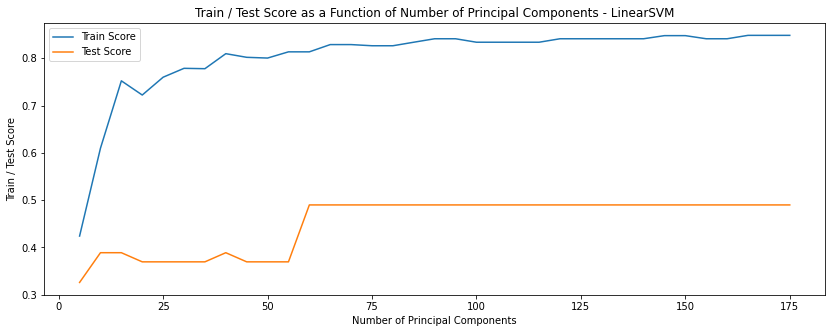

In [ ]:
# Instantiate model based on all-column parameter tuning
svm_reduce = LinearSVC(C=1, multi_class='ovr', random_state=0, max_iter=10000)

train_scores = []
test_scores = []
indices = []

idx = 0

for X_pit_reduced_train, X_pit_reduced_test, y_pit_train, y_pit_test in pit_dfs:
  indices.append(idx)
  svm_reduce.fit(X_pit_reduced_train, y_pit_train)
  train_scores.append(f1_score(y_pit_train, svm_reduce.predict(X_pit_reduced_train), average='macro'))
  test_scores.append(f1_score(y_pit_test, svm_reduce.predict(X_pit_reduced_test), average='macro'))
  idx += 1

num_feat_pca_train_scores = zip(num_feat_pca, train_scores)
num_feat_pca_test_scores = zip(num_feat_pca, test_scores)

print(max(num_feat_pca_train_scores, key = lambda x: x[1]))
print(max(num_feat_pca_test_scores, key = lambda x: x[1]))

plt.figure(figsize = (14, 5))
plt.plot(num_feat_pca, train_scores, label='Train Score')
plt.plot(num_feat_pca, test_scores, label='Test Score')
plt.xlabel('Number of Principal Components')
plt.ylabel('Train / Test Score')
plt.title('Train / Test Score as a Function of Number of Principal Components - LinearSVM')
plt.legend()
plt.axis('tight')
plt.show()

In [ ]:
print(sorted(list(zip(indices, num_feat_pca, test_scores)), key=lambda x: x[2], reverse = True))

[(11, 60, 0.48989898989898983), (12, 65, 0.48989898989898983), (13, 70, 0.48989898989898983), (14, 75, 0.48989898989898983), (15, 80, 0.48989898989898983), (16, 85, 0.48989898989898983), (17, 90, 0.48989898989898983), (18, 95, 0.48989898989898983), (19, 100, 0.48989898989898983), (20, 105, 0.48989898989898983), (21, 110, 0.48989898989898983), (22, 115, 0.48989898989898983), (23, 120, 0.48989898989898983), (24, 125, 0.48989898989898983), (25, 130, 0.48989898989898983), (26, 135, 0.48989898989898983), (27, 140, 0.48989898989898983), (28, 145, 0.48989898989898983), (29, 150, 0.48989898989898983), (30, 155, 0.48989898989898983), (31, 160, 0.48989898989898983), (32, 165, 0.48989898989898983), (33, 170, 0.48989898989898983), (34, 175, 0.48989898989898983), (1, 10, 0.3888888888888889), (2, 15, 0.3888888888888889), (7, 40, 0.3888888888888889), (3, 20, 0.3695652173913044), (4, 25, 0.3695652173913044), (5, 30, 0.3695652173913044), (6, 35, 0.3695652173913044), (8, 45, 0.3695652173913044), (9, 50,

In [ ]:
opt_idx = 2

svm_select_opt = LinearSVC(C=0.1, multi_class='ovr', random_state=0, max_iter=10000)

opt_train = pit_dfs[opt_idx][0]
opt_test = pit_dfs[opt_idx][1]

svm_select_opt.fit(opt_train, y_pit_train)

y_pred = svm_select_opt.predict(opt_test)
score = f1_score(y_pit_test, y_pred, average = 'macro')
print('Test F1 macro score:', score)

Test F1 macro score: 0.4066666666666667


In [ ]:
components = pd.DataFrame(pca_components[opt_idx], columns=X_pit.columns)
component_correlations = {}
for idx in components.index:
  component_correlations[idx] = list(zip(components.columns, components.iloc[idx].values))

for idx in component_correlations:
  top_features = sorted(component_correlations[idx], key=lambda x: np.abs(x[1]), reverse = True)[:10]
  print('\n')
  print('Component', idx, ':', pca_exp_var[opt_idx][idx])
  for feature in top_features:
    print(feature[0], ':', feature[1])



Component 0 : 0.20246358944936518
Percent!!INCOME AND BENEFITS (IN _ INFLATION-ADJUSTED DOLLARS)!!Families!!$200,000 or more_15 : 0.15139441278347693
Percent!!INCOME AND BENEFITS (IN _ INFLATION-ADJUSTED DOLLARS)!!Total households!!$200,000 or more_15 : 0.1459829788688736
Percent!!VALUE!!Owner-occupied units!!$1,000,000 or more_15 : 0.1257633758343935
Percent!!RACE!!One race!!Asian!!Japanese_15 : 0.12445056734827156
Percent!!WORLD REGION OF BIRTH OF FOREIGN BORN!!Foreign-born population, excluding population born at sea!!Oceania_15 : 0.1221322776568299
Percent!!GRANDPARENTS!!Number of grandparents responsible for own grandchildren under 18 years_15 : -0.11983299894200712
Percent!!HOUSE HEATING FUEL!!Occupied housing units!!Electricity_15 : 0.11918579736648499
Percent!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Graduate or professional degree_15 : 0.11825706878312886
Percent!!RESIDENCE 1 YEAR AGO!!Population 1 year and over!!Different house in the U.S.!!Different county!!Di

#### Random Forest

(5, 1.0)
(95, 0.6942028985507246)


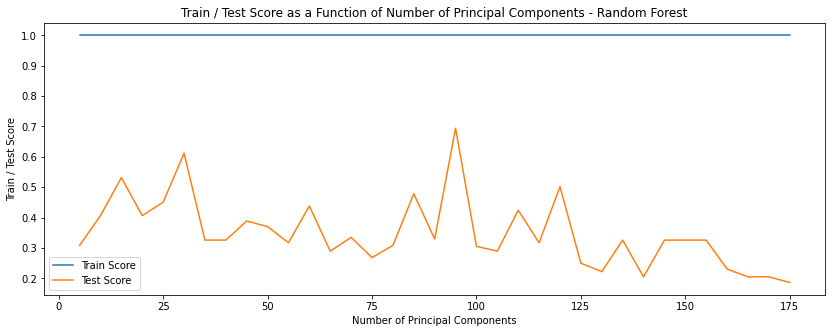

In [ ]:
# Instantiate model based on all-column parameter tuning
rf_reduce = RandomForestClassifier(n_estimators=32, max_depth=9, n_jobs=-1, random_state=0)

train_scores = []
test_scores = []
indices = []

idx = 0

for X_pit_reduced_train, X_pit_reduced_test, y_pit_train, y_pit_test in pit_dfs:
  indices.append(idx)
  rf_reduce.fit(X_pit_reduced_train, y_pit_train)
  train_scores.append(f1_score(y_pit_train, rf_reduce.predict(X_pit_reduced_train), average='macro'))
  test_scores.append(f1_score(y_pit_test, rf_reduce.predict(X_pit_reduced_test), average='macro'))
  idx += 1

num_feat_pca_train_scores = zip(num_feat_pca, train_scores)
num_feat_pca_test_scores = zip(num_feat_pca, test_scores)

print(max(num_feat_pca_train_scores, key = lambda x: x[1]))
print(max(num_feat_pca_test_scores, key = lambda x: x[1]))

plt.figure(figsize = (14, 5))
plt.plot(num_feat_pca, train_scores, label='Train Score')
plt.plot(num_feat_pca, test_scores, label='Test Score')
plt.xlabel('Number of Principal Components')
plt.ylabel('Train / Test Score')
plt.title('Train / Test Score as a Function of Number of Principal Components - Random Forest')
plt.legend()
plt.axis('tight')
plt.show()

In [ ]:
print(sorted(list(zip(indices, num_feat_pca, test_scores)), key=lambda x: x[2], reverse = True))

[(18, 95, 0.6942028985507246), (5, 30, 0.6119047619047618), (2, 15, 0.5318840579710145), (23, 120, 0.501904761904762), (16, 85, 0.4785714285714285), (4, 25, 0.4507936507936508), (11, 60, 0.43823326432022086), (21, 110, 0.4242424242424243), (1, 10, 0.4066666666666667), (3, 20, 0.4066666666666667), (8, 45, 0.3888888888888889), (9, 50, 0.3703703703703704), (13, 70, 0.3352380952380953), (17, 90, 0.32996632996632996), (6, 35, 0.326007326007326), (7, 40, 0.326007326007326), (26, 135, 0.326007326007326), (28, 145, 0.326007326007326), (29, 150, 0.326007326007326), (30, 155, 0.326007326007326), (10, 55, 0.3174603174603175), (22, 115, 0.3174603174603175), (0, 5, 0.30857142857142855), (15, 80, 0.30857142857142855), (19, 100, 0.3055555555555556), (12, 65, 0.2896825396825397), (20, 105, 0.2896825396825397), (14, 75, 0.26851851851851855), (24, 125, 0.24999999999999997), (31, 160, 0.2307692307692308), (25, 130, 0.2222222222222222), (27, 140, 0.2051282051282051), (32, 165, 0.2051282051282051), (33, 17

In [ ]:
opt_idx = 6

rf_select_opt = RandomForestClassifier(n_estimators=16, max_depth=4, n_jobs=-1, random_state=0)

opt_train = pit_dfs[opt_idx][0]
opt_test = pit_dfs[opt_idx][1]

rf_select_opt.fit(opt_train, y_pit_train)

y_pred = rf_select_opt.predict(opt_test)
score = f1_score(y_pit_test, y_pred, average = 'macro')
print('Test F1 macro score:', score)

Test F1 macro score: 0.47222222222222215


In [ ]:
components = pd.DataFrame(pca_components[opt_idx], columns=X_pit.columns)
component_correlations = {}
for idx in components.index:
  component_correlations[idx] = list(zip(components.columns, components.iloc[idx].values))

for idx in component_correlations:
  top_features = sorted(component_correlations[idx], key=lambda x: np.abs(x[1]), reverse = True)[:10]
  print('\n')
  print('Component', idx, ':', pca_exp_var[opt_idx][idx])
  for feature in top_features:
    print(feature[0], ':', feature[1])



Component 0 : 0.10448437507996101
Percent!!HOUSE HEATING FUEL!!Occupied housing units_15 : 0.15817057878218074
Percent!!HOUSEHOLDS BY TYPE!!Total households_15 : 0.15817057878218074
Percent!!HOUSING TENURE!!Occupied housing units_15 : 0.15817057878218074
Percent!!INCOME AND BENEFITS (IN _ INFLATION-ADJUSTED DOLLARS)!!Total households_15 : 0.15817057878218074
Percent!!OCCUPANTS PER ROOM!!Occupied housing units_15 : 0.15817057878218074
Percent!!SELECTED CHARACTERISTICS!!Occupied housing units_15 : 0.15817057878218074
Percent!!VEHICLES AVAILABLE!!Occupied housing units_15 : 0.15817057878218074
Percent!!YEAR HOUSEHOLDER MOVED INTO UNIT!!Occupied housing units_15 : 0.15817057878218074
Percent!!HOUSING OCCUPANCY!!Total housing units_15 : 0.15505138379311517
Percent!!ROOMS!!Total housing units_15 : 0.15505138379311517


Component 1 : 0.059237257896099224
Percent!!SEX AND AGE!!62 years and over_15 : -0.19513821124898684
Percent!!SEX AND AGE!!75 to 84 years_15 : -0.1869491243144736
Percent!!S

In [ ]:
list(train_errors['Predict'].values)

## CAGR Data

### Feature Selection - SelectKBest

In [ ]:
X_cagr_train_dfs = []
X_cagr_test_dfs = []
num_feat_kb = []

# Scale X_cagr_train and X_cagr_test between 0 and 1
scaler = MinMaxScaler()
X_cagr_train_pos = scaler.fit_transform(X_cagr_train)
X_cagr_train_pos = pd.DataFrame(X_cagr_train_pos, index=X_cagr_train.index, columns=X_cagr_train.columns)

X_cagr_test_pos = scaler.fit_transform(X_cagr_test)
X_cagr_test_pos = pd.DataFrame(X_cagr_test_pos, index=X_cagr_test.index, columns=X_cagr_test.columns)

for k in range(10, X_cagr_train_pos.shape[1], 10):
  num_feat_kb.append(k)
  kBest = SelectKBest(chi2, k)
  kBest.fit(X_cagr_train_pos, y_cagr_train)
  k_best_col_idx = kBest.get_support(indices=True)
  k_best_cols = []
  for idx in k_best_col_idx:
    k_best_cols.append(list(X_cagr_train_pos.columns)[idx])
  X_cagr_train_dfs.append(X_cagr_train_pos[k_best_cols])
  X_cagr_test_dfs.append(X_cagr_test_pos[k_best_cols])

X_cagr_train_test_dfs = list(zip(X_cagr_train_dfs, X_cagr_test_dfs))

#### Logistic Regression

(120, 1.0)
(220, 0.35269360269360267)


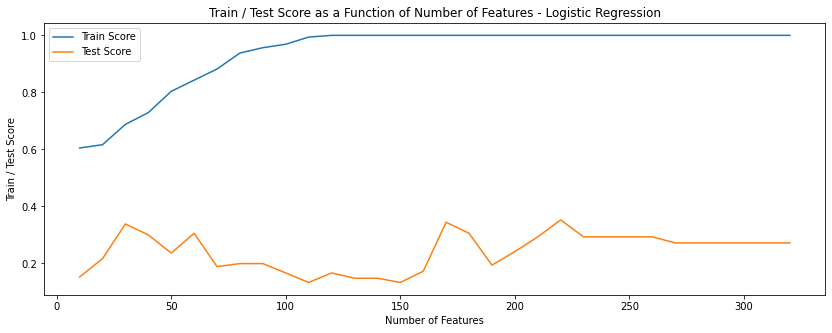

In [ ]:
# Instantiate model based on all-column parameter tuning
log_reg_select = LogisticRegression(penalty='l2', C=100, random_state=0, max_iter=10000, multi_class='ovr')

train_scores = []
test_scores = []
indices = []

idx = 0

for train, test in X_cagr_train_test_dfs:
  indices.append(idx)
  log_reg_select.fit(train, y_cagr_train)
  train_scores.append(f1_score(y_cagr_train, log_reg_select.predict(train), average='macro'))
  test_scores.append(f1_score(y_cagr_test, log_reg_select.predict(test), average='macro'))
  idx += 1

num_feat_kb_train_scores = zip(num_feat_kb, train_scores)
num_feat_kb_test_scores = zip(num_feat_kb, test_scores)

print(max(num_feat_kb_train_scores, key = lambda x: x[1]))
print(max(num_feat_kb_test_scores, key = lambda x: x[1]))

plt.figure(figsize = (14, 5))
plt.plot(num_feat_kb, train_scores, label='Train Score')
plt.plot(num_feat_kb, test_scores, label='Test Score')
plt.xlabel('Number of Features')
plt.ylabel('Train / Test Score')
plt.title('Train / Test Score as a Function of Number of Features - Logistic Regression')
plt.legend()
plt.axis('tight')
plt.show()

In [ ]:
print(sorted(list(zip(indices, num_feat_kb, test_scores)), key=lambda x: x[2], reverse = True))

[(21, 220, 0.35269360269360267), (16, 170, 0.3444444444444444), (2, 30, 0.3384615384615384), (5, 60, 0.30570409982174684), (17, 180, 0.30570409982174684), (3, 40, 0.3), (20, 210, 0.2932461873638344), (22, 230, 0.2932461873638344), (23, 240, 0.2932461873638344), (24, 250, 0.2932461873638344), (25, 260, 0.2932461873638344), (26, 270, 0.2719298245614035), (27, 280, 0.2719298245614035), (28, 290, 0.2719298245614035), (29, 300, 0.2719298245614035), (30, 310, 0.2719298245614035), (31, 320, 0.2719298245614035), (19, 200, 0.24166666666666667), (4, 50, 0.23650793650793653), (1, 20, 0.21666666666666667), (7, 80, 0.19943019943019943), (8, 90, 0.19943019943019943), (18, 190, 0.19393939393939394), (6, 70, 0.18888888888888888), (15, 160, 0.17254901960784316), (9, 100, 0.16666666666666666), (11, 120, 0.16666666666666666), (0, 10, 0.15250544662309368), (12, 130, 0.14814814814814814), (13, 140, 0.14814814814814814), (10, 110, 0.13333333333333333), (14, 150, 0.13333333333333333)]


In [ ]:
opt_idx = 2

log_reg_select_opt = LogisticRegression(penalty='l2', C=10, random_state=0, max_iter=10000, multi_class='ovr')

opt_train = X_cagr_train_test_dfs[opt_idx][0]
opt_test = X_cagr_train_test_dfs[opt_idx][1]

log_reg_select_opt.fit(opt_train, y_cagr_train)

y_pred = log_reg_select_opt.predict(opt_test)
score = f1_score(y_cagr_test, y_pred, average = 'macro')
print('Test F1 macro score:', score)

print('\nMost Important Features')
most_important_features(log_reg_select_opt, opt_train)

Test F1 macro score: 0.3972323972323972

Most Important Features
1
Positive
(4.008637661390022, 'Percent!!PLACE OF BIRTH!!Total population!!Native!!Born in United States!!Different state_cagr')
(3.618932381305706, 'Percent!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Graduate or professional degree_cagr')
(2.8680441533303105, 'Percent!!HOUSE HEATING FUEL!!Occupied housing units!!Electricity_cagr')
(2.4949946470024615, 'Percent!!HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino!!White alone_cagr')
(2.192338221891775, 'Percent!!SEX AND AGE!!35 to 44 years_cagr')
Negative
(-2.5156068215815255, 'Percent!!INCOME AND BENEFITS (IN _ INFLATION-ADJUSTED DOLLARS)!!Total households!!Less than $10,000_cagr')
(-1.3771501644290998, 'Percent!!UNITS IN STRUCTURE!!Total housing units!!Mobile home_cagr')
(-1.2265863529413703, 'Percent!!HOUSE HEATING FUEL!!Occupied housing units!!Coal or coke_cagr')
(-1.01827424094952, 'Percent!!PLACE OF BIRTH!!Total population!!Native!!Born

#### Support Vector Machine

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


(120, 1.0)
(30, 0.447008547008547)


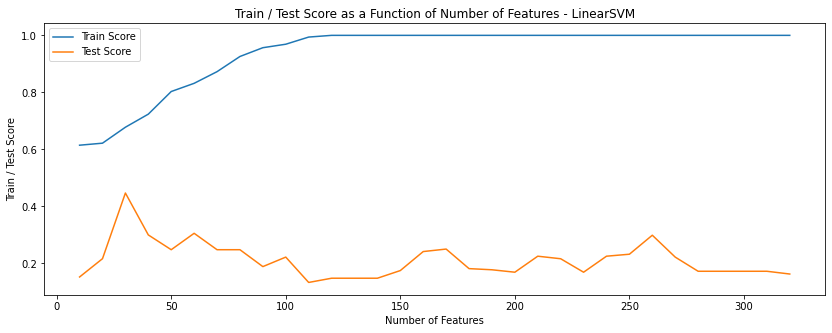

In [ ]:
# Instantiate model based on all-column parameter tuning
svm_select = LinearSVC(C=10, multi_class='ovr', random_state=0, max_iter=10000)

train_scores = []
test_scores = []
indices = []

idx = 0

for train, test in X_cagr_train_test_dfs:
  indices.append(idx)
  svm_select.fit(train, y_cagr_train)
  train_scores.append(f1_score(y_cagr_train, svm_select.predict(train), average='macro'))
  test_scores.append(f1_score(y_cagr_test, svm_select.predict(test), average='macro'))

  idx += 1

num_feat_kb_train_scores = zip(num_feat_kb, train_scores)
num_feat_kb_test_scores = zip(num_feat_kb, test_scores)

print(max(num_feat_kb_train_scores, key = lambda x: x[1]))
print(max(num_feat_kb_test_scores, key = lambda x: x[1]))

plt.figure(figsize = (14, 5))
plt.plot(num_feat_kb, train_scores, label='Train Score')
plt.plot(num_feat_kb, test_scores, label='Test Score')
plt.xlabel('Number of Features')
plt.ylabel('Train / Test Score')
plt.title('Train / Test Score as a Function of Number of Features - LinearSVM')
plt.legend()
plt.axis('tight')
plt.show()

In [ ]:
print(sorted(list(zip(indices, num_feat_kb, test_scores)), key=lambda x: x[2], reverse = True))

[(2, 30, 0.447008547008547), (5, 60, 0.30570409982174684), (3, 40, 0.3), (25, 260, 0.298989898989899), (16, 170, 0.2504208754208754), (4, 50, 0.24814814814814812), (6, 70, 0.24814814814814812), (7, 80, 0.24814814814814812), (15, 160, 0.24166666666666667), (24, 250, 0.2323232323232323), (20, 210, 0.2253968253968254), (23, 240, 0.2253968253968254), (9, 100, 0.2222222222222222), (26, 270, 0.2222222222222222), (1, 20, 0.21666666666666667), (21, 220, 0.21645021645021645), (8, 90, 0.18888888888888888), (17, 180, 0.1818181818181818), (18, 190, 0.17777777777777778), (14, 150, 0.17500000000000002), (27, 280, 0.17254901960784316), (28, 290, 0.17254901960784316), (29, 300, 0.17254901960784316), (30, 310, 0.17254901960784316), (19, 200, 0.1692307692307692), (22, 230, 0.1692307692307692), (31, 320, 0.16287878787878787), (0, 10, 0.15250544662309368), (11, 120, 0.14814814814814814), (12, 130, 0.14814814814814814), (13, 140, 0.14814814814814814), (10, 110, 0.13333333333333333)]


In [ ]:
opt_idx = 0

svm_select_opt = LinearSVC(C=0.1, multi_class='ovr', random_state=0, max_iter=10000)

opt_train = X_cagr_train_test_dfs[opt_idx][0]
opt_test = X_cagr_train_test_dfs[opt_idx][1]

svm_select_opt.fit(opt_train, y_cagr_train)

y_pred = svm_select_opt.predict(opt_test)
score = f1_score(y_cagr_test, y_pred, average = 'macro')
print('Test F1 macro score:', score)


print('\nMost Important Features')
most_important_features(svm_select_opt, opt_train)


Test F1 macro score: 0.4158730158730159

Most Important Features
1
Positive
(0.5782757766221814, 'Percent!!PLACE OF BIRTH!!Total population!!Native!!Born in United States!!Different state_cagr')
(0.31963438587341936, 'Percent!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Graduate or professional degree_cagr')
(0.2609909245124538, 'Percent!!HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino!!White alone_cagr')
(0.2280147434389126, 'Percent!!SEX AND AGE!!35 to 44 years_cagr')
(0.16522663292564976, "Percent!!EDUCATIONAL ATTAINMENT!!Percent bachelor's degree or higher_cagr")
Negative
(-0.42699406272529705, 'Percent!!HOUSE HEATING FUEL!!Occupied housing units!!Coal or coke_cagr')
(-0.2161125586755027, 'Percent!!YEAR STRUCTURE BUILT!!Total housing units_cagr')
(-0.008359709335678431, 'Percent!!RELATIONSHIP!!Population in households_cagr')
(0.013171994092154336, 'Percent!!VALUE!!Owner-occupied units!!$50,000 to $99,999_cagr')
(0.09581038361423835, 'Percent!!RESIDEN

#### Random Forest

(50, 1.0)
(70, 0.5)


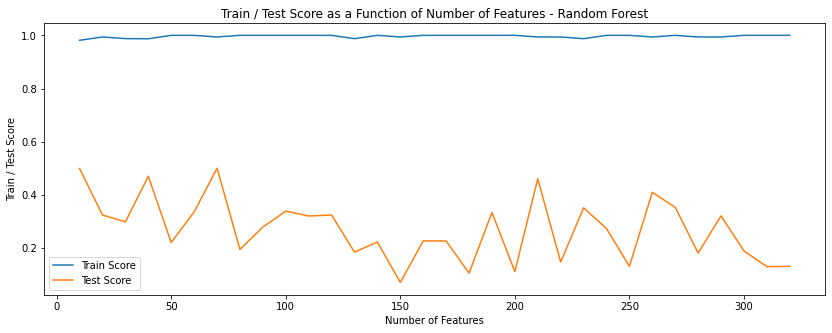

In [ ]:
# Instantiate model based on all-column parameter tuning
rf_select = RandomForestClassifier(n_estimators=16, max_depth=10, n_jobs=-1, random_state=0)

train_scores = []
test_scores = []
indices = []

idx = 0

for train, test in X_cagr_train_test_dfs:
  indices.append(idx)
  rf_select.fit(train, y_cagr_train)
  train_scores.append(f1_score(y_cagr_train, rf_select.predict(train), average='macro'))
  test_scores.append(f1_score(y_cagr_test, rf_select.predict(test), average='macro'))

  idx += 1

num_feat_kb_train_scores = zip(num_feat_kb, train_scores)
num_feat_kb_test_scores = zip(num_feat_kb, test_scores)

print(max(num_feat_kb_train_scores, key = lambda x: x[1]))
print(max(num_feat_kb_test_scores, key = lambda x: x[1]))

plt.figure(figsize = (14, 5))
plt.plot(num_feat_kb, train_scores, label='Train Score')
plt.plot(num_feat_kb, test_scores, label='Test Score')
plt.xlabel('Number of Features')
plt.ylabel('Train / Test Score')
plt.title('Train / Test Score as a Function of Number of Features - Random Forest')
plt.legend()
plt.axis('tight')
plt.show()

In [ ]:
print(sorted(list(zip(indices, num_feat_kb, test_scores)), key=lambda x: x[2], reverse = True))

[(6, 70, 0.5), (0, 10, 0.49908424908424903), (3, 40, 0.46967846967846966), (20, 210, 0.4603174603174603), (25, 260, 0.40940170940170945), (26, 270, 0.35269360269360267), (22, 230, 0.3511904761904762), (9, 100, 0.3384615384615384), (5, 60, 0.3351851851851852), (18, 190, 0.3333333333333333), (1, 20, 0.3239962651727358), (11, 120, 0.3238095238095238), (28, 290, 0.3206349206349206), (10, 110, 0.3202861952861953), (2, 30, 0.2981481481481481), (8, 90, 0.2786195286195286), (23, 240, 0.273015873015873), (15, 160, 0.22647527910685805), (16, 170, 0.2261904761904762), (13, 140, 0.2222222222222222), (4, 50, 0.2205942205942206), (7, 80, 0.19444444444444445), (29, 300, 0.18859649122807018), (12, 130, 0.1843137254901961), (27, 280, 0.18099547511312217), (21, 220, 0.147008547008547), (24, 250, 0.13095238095238096), (31, 320, 0.1307814992025518), (30, 310, 0.12962962962962962), (19, 200, 0.11111111111111112), (17, 180, 0.10526315789473684), (14, 150, 0.07017543859649122)]


In [ ]:
opt_idx = 3

rf_select_opt = RandomForestClassifier(n_estimators=16, max_depth=4, n_jobs=-1, random_state=0)

opt_train = X_cagr_train_test_dfs[opt_idx][0]
opt_test = X_cagr_train_test_dfs[opt_idx][1]

rf_select_opt.fit(opt_train, y_cagr_train)

y_pred = rf_select_opt.predict(opt_test)
score = f1_score(y_cagr_test, y_pred, average = 'macro')
print('Test F1 macro score:', score)

print('\nMost Important Features')
important_features = zip(rf_select_opt.feature_importances_, opt_train.columns)

for tup in sorted(important_features, reverse=True, key = lambda x: x[0])[:10]:
  print(tup)

Test F1 macro score: 0.4861111111111111

Most Important Features
(0.1308728683894171, 'Percent!!MORTGAGE STATUS!!Owner-occupied units!!Housing units with a mortgage_cagr')
(0.07959971834822809, 'Percent!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Graduate or professional degree_cagr')
(0.06243877610838266, 'Percent!!PLACE OF BIRTH!!Total population!!Native!!Born in United States!!Different state_cagr')
(0.05504265874602611, 'Percent!!INCOME AND BENEFITS (IN _ INFLATION-ADJUSTED DOLLARS)!!Total households!!Less than $10,000_cagr')
(0.052512272898724816, 'Percent!!SEX AND AGE!!35 to 44 years_cagr')
(0.05190096357084301, 'Percent!!PLACE OF BIRTH!!Total population!!Native_cagr')
(0.05062584602820388, 'Percent!!RESIDENCE 1 YEAR AGO!!Population 1 year and over!!Different house in the U.S.!!Different county_cagr')
(0.04629859787310066, 'Percent!!HOUSE HEATING FUEL!!Occupied housing units!!Electricity_cagr')
(0.04216897195657391, 'Percent!!YEAR HOUSEHOLDER MOVED INTO UNIT!!Occupied 

In [ ]:
important_features = zip(rf_all_opt.feature_importances_, X_cagr_train.columns)

for tup in sorted(important_features, reverse=True, key = lambda x: x[0])[:10]:
  print(tup)

(0.028762350370777248, 'Percent!!SEX AND AGE!!Under 5 years_cagr')
(0.02085733148779902, 'Percent!!RACE!!Two or more races!!White and Asian_cagr')
(0.019553735575840663, 'Percent!!ROOMS!!Total housing units!!5 rooms_cagr')
(0.01760492705041255, 'Percent!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Graduate or professional degree_cagr')
(0.01565554744185565, 'Percent!!PLACE OF BIRTH!!Total population!!Native!!Born in United States!!Different state_cagr')
(0.014100905224996857, 'Percent!!RELATIONSHIP!!Population in households!!Nonrelatives_cagr')
(0.014021046196730507, 'Percent!!MARITAL STATUS!!Females 15 years and over!!Now married, except separated_cagr')
(0.013715605100962553, 'Percent!!OCCUPATION!!Civilian employed population 16 years and over!!Management, business, science, and arts occupations_cagr')
(0.012588391799983358, 'Percent!!MORTGAGE STATUS!!Owner-occupied units!!Housing units with a mortgage_cagr')
(0.011936510616721978, 'Percent!!SELECTED MONTHLY OWNER COSTS AS 

### Dimensionality Reduction - PCA

In [ ]:
cagr_dfs = []
num_feat_pca = []
pca_components = []
pca_exp_var = []

for n in range(5, X_cagr.shape[0], 5):
  num_feat_pca.append(n)
  pca = PCA(n, random_state=0)
  X_cagr_reduced = pca.fit_transform(X_cagr, y_cagr)
  pca_components.append(pca.components_)
  pca_exp_var.append(pca.explained_variance_ratio_)
  X_cagr_reduced_train, X_cagr_reduced_test, y_cagr_train, y_cagr_test = train_test_split(X_cagr_reduced, y_cagr, test_size=test_size, random_state=0) 
  cagr_dfs.append((X_cagr_reduced_train, X_cagr_reduced_test, y_cagr_train, y_cagr_test))

#### Logistic Regression

(115, 1.0)
(15, 0.5466988727858293)


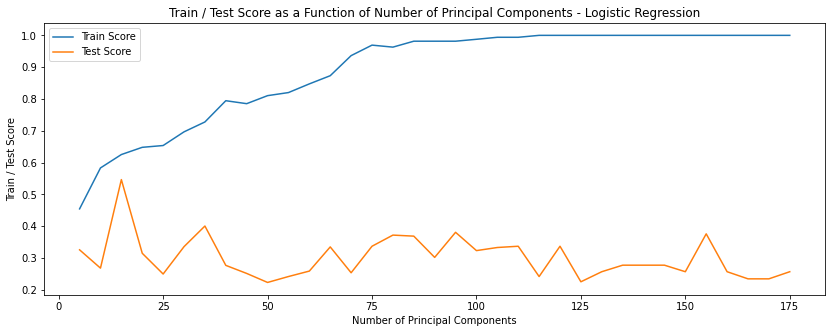

In [ ]:
# Instantiate model based on all-column parameter tuning
log_reg_reduce = LogisticRegression(penalty='l2', C=100, random_state=0, max_iter=10000, multi_class='ovr')

train_scores = []
test_scores = []
indices = []

idx = 0

for X_cagr_reduced_train, X_cagr_reduced_test, y_cagr_train, y_cagr_test in cagr_dfs:
  indices.append(idx)
  log_reg_reduce.fit(X_cagr_reduced_train, y_cagr_train)
  train_scores.append(f1_score(y_cagr_train, log_reg_reduce.predict(X_cagr_reduced_train), average='macro'))
  test_scores.append(f1_score(y_cagr_test, log_reg_reduce.predict(X_cagr_reduced_test), average='macro'))
  idx += 1

num_feat_pca_train_scores = zip(num_feat_pca, train_scores)
num_feat_pca_test_scores = zip(num_feat_pca, test_scores)

print(max(num_feat_pca_train_scores, key = lambda x: x[1]))
print(max(num_feat_pca_test_scores, key = lambda x: x[1]))

plt.figure(figsize = (14, 5))
plt.plot(num_feat_pca, train_scores, label='Train Score')
plt.plot(num_feat_pca, test_scores, label='Test Score')
plt.xlabel('Number of Principal Components')
plt.ylabel('Train / Test Score')
plt.title('Train / Test Score as a Function of Number of Principal Components - Logistic Regression')
plt.legend()
plt.axis('tight')
plt.show()

In [ ]:
print(sorted(list(zip(indices, num_feat_pca, test_scores)), key=lambda x: x[2], reverse = True))

[(2, 15, 0.5466988727858293), (6, 35, 0.40079365079365076), (18, 95, 0.3810916179337232), (30, 155, 0.3762626262626263), (15, 80, 0.37229437229437234), (16, 85, 0.36904761904761907), (21, 110, 0.3373015873015874), (14, 75, 0.33730158730158727), (23, 120, 0.33730158730158727), (5, 30, 0.335978835978836), (12, 65, 0.3351851851851852), (20, 105, 0.3333333333333333), (0, 5, 0.326007326007326), (19, 100, 0.3235867446393762), (3, 20, 0.31521739130434784), (17, 90, 0.3022556390977444), (26, 135, 0.2777777777777778), (27, 140, 0.2777777777777778), (28, 145, 0.2777777777777778), (7, 40, 0.2771929824561403), (1, 10, 0.26851851851851855), (11, 60, 0.25925925925925924), (25, 130, 0.2572463768115942), (29, 150, 0.2572463768115942), (31, 160, 0.2572463768115942), (34, 175, 0.2572463768115942), (13, 70, 0.25396825396825395), (8, 45, 0.2518518518518518), (4, 25, 0.25), (10, 55, 0.24210526315789474), (22, 115, 0.24210526315789474), (32, 165, 0.23484848484848486), (33, 170, 0.23484848484848486), (24, 12

In [ ]:
opt_idx = 0

log_reg_reduce_opt = LogisticRegression(penalty='l2', C=10, random_state=0, max_iter=10000, multi_class='ovr')

opt_train = cagr_dfs[opt_idx][0]
opt_test = cagr_dfs[opt_idx][1]

log_reg_reduce_opt.fit(opt_train, y_cagr_train)

y_pred = log_reg_reduce_opt.predict(opt_test)
score = f1_score(y_cagr_test, y_pred, average = 'macro')
print('Test F1 macro score:', score)

Test F1 macro score: 0.326007326007326


In [ ]:
components = pd.DataFrame(pca_components[opt_idx], columns=X_cagr.columns)
component_correlations = {}
for idx in components.index:
  component_correlations[idx] = list(zip(components.columns, components.iloc[idx].values))

for idx in component_correlations:
  top_features = sorted(component_correlations[idx], key=lambda x: np.abs(x[1]), reverse = True)[:10]
  print('\n')
  print('Component', idx, ':', pca_exp_var[opt_idx][idx])
  for feature in top_features:
    print(feature[0], ':', feature[1])



Component 0 : 0.10448437507996101
Percent!!HOUSE HEATING FUEL!!Occupied housing units_cagr : 0.15817057878218074
Percent!!HOUSEHOLDS BY TYPE!!Total households_cagr : 0.15817057878218074
Percent!!HOUSING TENURE!!Occupied housing units_cagr : 0.15817057878218074
Percent!!INCOME AND BENEFITS (IN _ INFLATION-ADJUSTED DOLLARS)!!Total households_cagr : 0.15817057878218074
Percent!!OCCUPANTS PER ROOM!!Occupied housing units_cagr : 0.15817057878218074
Percent!!SELECTED CHARACTERISTICS!!Occupied housing units_cagr : 0.15817057878218074
Percent!!VEHICLES AVAILABLE!!Occupied housing units_cagr : 0.15817057878218074
Percent!!YEAR HOUSEHOLDER MOVED INTO UNIT!!Occupied housing units_cagr : 0.15817057878218074
Percent!!HOUSING OCCUPANCY!!Total housing units_cagr : 0.15505138379311517
Percent!!ROOMS!!Total housing units_cagr : 0.15505138379311517


Component 1 : 0.059237257896099224
Percent!!SEX AND AGE!!62 years and over_cagr : -0.19513821124898684
Percent!!SEX AND AGE!!75 to 84 years_cagr : -0.186

#### Support Vector Machine

(115, 1.0)
(15, 0.5466988727858293)


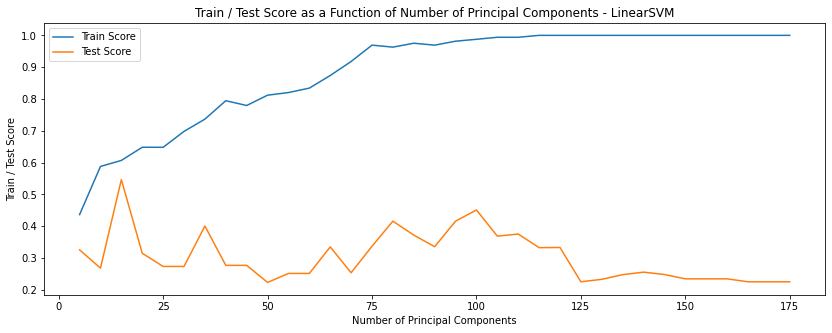

In [ ]:
# Instantiate model based on all-column parameter tuning
svm_reduce = LinearSVC(C=10, multi_class='ovr', random_state=0, max_iter=10000)

train_scores = []
test_scores = []
indices = []

idx = 0

for X_cagr_reduced_train, X_cagr_reduced_test, y_cagr_train, y_cagr_test in cagr_dfs:
  indices.append(idx)
  svm_reduce.fit(X_cagr_reduced_train, y_cagr_train)
  train_scores.append(f1_score(y_cagr_train, svm_reduce.predict(X_cagr_reduced_train), average='macro'))
  test_scores.append(f1_score(y_cagr_test, svm_reduce.predict(X_cagr_reduced_test), average='macro'))
  idx += 1

num_feat_pca_train_scores = zip(num_feat_pca, train_scores)
num_feat_pca_test_scores = zip(num_feat_pca, test_scores)

print(max(num_feat_pca_train_scores, key = lambda x: x[1]))
print(max(num_feat_pca_test_scores, key = lambda x: x[1]))

plt.figure(figsize = (14, 5))
plt.plot(num_feat_pca, train_scores, label='Train Score')
plt.plot(num_feat_pca, test_scores, label='Test Score')
plt.xlabel('Number of Principal Components')
plt.ylabel('Train / Test Score')
plt.title('Train / Test Score as a Function of Number of Principal Components - LinearSVM')
plt.legend()
plt.axis('tight')
plt.show()

In [ ]:
print(sorted(list(zip(indices, num_feat_pca, test_scores)), key=lambda x: x[2], reverse = True))

[(2, 15, 0.5466988727858293), (19, 100, 0.45126705653021437), (15, 80, 0.4161793372319688), (18, 95, 0.4161793372319688), (6, 35, 0.40079365079365076), (21, 110, 0.37566137566137564), (16, 85, 0.37229437229437234), (20, 105, 0.36904761904761907), (14, 75, 0.33730158730158727), (17, 90, 0.335978835978836), (12, 65, 0.3351851851851852), (23, 120, 0.3333333333333333), (22, 115, 0.33284600389863545), (0, 5, 0.326007326007326), (3, 20, 0.31521739130434784), (7, 40, 0.2771929824561403), (8, 45, 0.2771929824561403), (4, 25, 0.27380952380952384), (5, 30, 0.27380952380952384), (1, 10, 0.26851851851851855), (27, 140, 0.2558922558922559), (13, 70, 0.25396825396825395), (10, 55, 0.2518518518518518), (11, 60, 0.2518518518518518), (28, 145, 0.24848484848484853), (26, 135, 0.24798711755233493), (29, 150, 0.23484848484848486), (30, 155, 0.23484848484848486), (31, 160, 0.23484848484848486), (25, 130, 0.2333333333333333), (24, 125, 0.2255892255892256), (32, 165, 0.2255892255892256), (33, 170, 0.22558922

In [ ]:
opt_idx = 5

svm_select_opt = LinearSVC(C=0.1, multi_class='ovr', random_state=0, max_iter=10000)

opt_train = cagr_dfs[opt_idx][0]
opt_test = cagr_dfs[opt_idx][1]

svm_select_opt.fit(opt_train, y_cagr_train)

y_pred = svm_select_opt.predict(opt_test)
score = f1_score(y_cagr_test, y_pred, average = 'macro')
print('Test F1 macro score:', score)

Test F1 macro score: 0.501904761904762


In [ ]:
components = pd.DataFrame(pca_components[opt_idx], columns=X_cagr.columns)
component_correlations = {}
for idx in components.index:
  component_correlations[idx] = list(zip(components.columns, components.iloc[idx].values))

for idx in component_correlations:
  top_features = sorted(component_correlations[idx], key=lambda x: np.abs(x[1]), reverse = True)[:10]
  print('\n')
  print('Component', idx, ':', pca_exp_var[opt_idx][idx])
  for feature in top_features:
    print(feature[0], ':', feature[1])



Component 0 : 0.10448437507996101
Percent!!HOUSE HEATING FUEL!!Occupied housing units_cagr : 0.15817057878218074
Percent!!HOUSEHOLDS BY TYPE!!Total households_cagr : 0.15817057878218074
Percent!!HOUSING TENURE!!Occupied housing units_cagr : 0.15817057878218074
Percent!!INCOME AND BENEFITS (IN _ INFLATION-ADJUSTED DOLLARS)!!Total households_cagr : 0.15817057878218074
Percent!!OCCUPANTS PER ROOM!!Occupied housing units_cagr : 0.15817057878218074
Percent!!SELECTED CHARACTERISTICS!!Occupied housing units_cagr : 0.15817057878218074
Percent!!VEHICLES AVAILABLE!!Occupied housing units_cagr : 0.15817057878218074
Percent!!YEAR HOUSEHOLDER MOVED INTO UNIT!!Occupied housing units_cagr : 0.15817057878218074
Percent!!HOUSING OCCUPANCY!!Total housing units_cagr : 0.15505138379311517
Percent!!ROOMS!!Total housing units_cagr : 0.15505138379311517


Component 1 : 0.059237257896099224
Percent!!SEX AND AGE!!62 years and over_cagr : -0.19513821124898684
Percent!!SEX AND AGE!!75 to 84 years_cagr : -0.186

#### Random Forest

(10, 1.0)
(10, 0.5505050505050505)


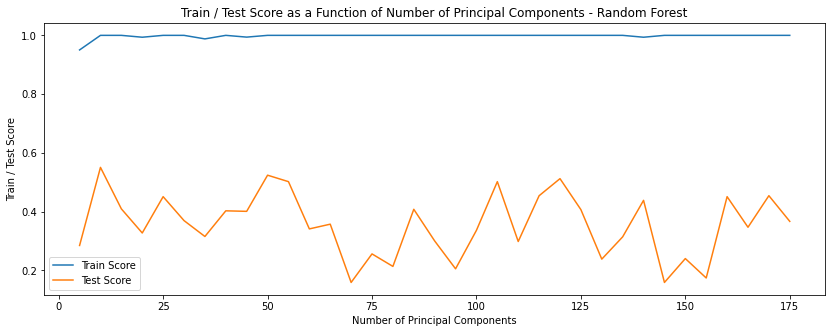

In [ ]:
# Instantiate model based on all-column parameter tuning
rf_reduce = RandomForestClassifier(n_estimators=16, max_depth=10, n_jobs=-1, random_state=0)

train_scores = []
test_scores = []
indices = []

idx = 0

for X_cagr_reduced_train, X_cagr_reduced_test, y_cagr_train, y_cagr_test in cagr_dfs:
  indices.append(idx)
  rf_reduce.fit(X_cagr_reduced_train, y_cagr_train)
  train_scores.append(f1_score(y_cagr_train, rf_reduce.predict(X_cagr_reduced_train), average='macro'))
  test_scores.append(f1_score(y_cagr_test, rf_reduce.predict(X_cagr_reduced_test), average='macro'))
  idx += 1

num_feat_pca_train_scores = zip(num_feat_pca, train_scores)
num_feat_pca_test_scores = zip(num_feat_pca, test_scores)

print(max(num_feat_pca_train_scores, key = lambda x: x[1]))
print(max(num_feat_pca_test_scores, key = lambda x: x[1]))

plt.figure(figsize = (14, 5))
plt.plot(num_feat_pca, train_scores, label='Train Score')
plt.plot(num_feat_pca, test_scores, label='Test Score')
plt.xlabel('Number of Principal Components')
plt.ylabel('Train / Test Score')
plt.title('Train / Test Score as a Function of Number of Principal Components - Random Forest')
plt.legend()
plt.axis('tight')
plt.show()

In [ ]:
print(sorted(list(zip(indices, num_feat_pca, test_scores)), key=lambda x: x[2], reverse = True))

[(1, 10, 0.5505050505050505), (9, 50, 0.5239057239057239), (23, 120, 0.5121212121212121), (10, 55, 0.501904761904762), (20, 105, 0.501904761904762), (33, 170, 0.4541062801932367), (22, 115, 0.45396825396825397), (4, 25, 0.4507936507936508), (31, 160, 0.4507936507936508), (27, 140, 0.43823326432022086), (2, 15, 0.40924775707384403), (16, 85, 0.4077618288144604), (24, 125, 0.4066666666666667), (7, 40, 0.4025974025974026), (8, 45, 0.40079365079365076), (5, 30, 0.3693121693121693), (34, 175, 0.3666666666666667), (12, 65, 0.3571428571428572), (32, 165, 0.3466666666666667), (11, 60, 0.341029341029341), (19, 100, 0.336231884057971), (3, 20, 0.3271221532091097), (6, 35, 0.31521739130434784), (26, 135, 0.3140096618357488), (17, 90, 0.3), (21, 110, 0.298136645962733), (0, 5, 0.28460038986354774), (14, 75, 0.2558922558922559), (29, 150, 0.24), (25, 130, 0.2380952380952381), (15, 80, 0.21333333333333335), (18, 95, 0.2051282051282051), (30, 155, 0.17391304347826086), (13, 70, 0.15873015873015875), 

In [ ]:
opt_idx = 0
rf_select_opt = RandomForestClassifier(n_estimators=16, max_depth=4, n_jobs=-1, random_state=0)

opt_train = cagr_dfs[opt_idx][0]
opt_test = cagr_dfs[opt_idx][1]

rf_select_opt.fit(opt_train, y_cagr_train)

y_pred = rf_select_opt.predict(opt_test)
score = f1_score(y_cagr_test, y_pred, average = 'macro')
print('Test F1 macro score:', score)

Test F1 macro score: 0.3981481481481481


In [ ]:
components = pd.DataFrame(pca_components[opt_idx], columns=X_cagr.columns)
component_correlations = {}
for idx in components.index:
  component_correlations[idx] = list(zip(components.columns, components.iloc[idx].values))

for idx in component_correlations:
  top_features = sorted(component_correlations[idx], key=lambda x: np.abs(x[1]), reverse = True)[:10]
  print('\n')
  print('Component', idx, ':', pca_exp_var[opt_idx][idx])
  for feature in top_features:
    print(feature[0], ':', feature[1])



Component 0 : 0.10448437507996101
Percent!!HOUSE HEATING FUEL!!Occupied housing units_cagr : 0.15817057878218074
Percent!!HOUSEHOLDS BY TYPE!!Total households_cagr : 0.15817057878218074
Percent!!HOUSING TENURE!!Occupied housing units_cagr : 0.15817057878218074
Percent!!INCOME AND BENEFITS (IN _ INFLATION-ADJUSTED DOLLARS)!!Total households_cagr : 0.15817057878218074
Percent!!OCCUPANTS PER ROOM!!Occupied housing units_cagr : 0.15817057878218074
Percent!!SELECTED CHARACTERISTICS!!Occupied housing units_cagr : 0.15817057878218074
Percent!!VEHICLES AVAILABLE!!Occupied housing units_cagr : 0.15817057878218074
Percent!!YEAR HOUSEHOLDER MOVED INTO UNIT!!Occupied housing units_cagr : 0.15817057878218074
Percent!!HOUSING OCCUPANCY!!Total housing units_cagr : 0.15505138379311517
Percent!!ROOMS!!Total housing units_cagr : 0.15505138379311517


Component 1 : 0.059237257896099224
Percent!!SEX AND AGE!!62 years and over_cagr : -0.19513821124898684
Percent!!SEX AND AGE!!75 to 84 years_cagr : -0.186